In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['heartDiseaseAndAges.png', 'heart.csv', '.DS_Store', '340W_Stroke_Report2.docx', '340W_Stroke_Report2.pdf', 'kor_contribution&novelty.docx', 'heart_Disease.ipynb']


In [177]:
# Load your data
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/DS340W/Week_11/heart_disease')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
data = pd.read_csv("heart.csv")

In [179]:
type(data)

pandas.core.frame.DataFrame

In [180]:
data.shape

(303, 14)

In [181]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [182]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking .

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity.

Note that thalassemia, one of the variables in this dataset, is heredity.

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes.

Other factors include stress, alcohol and poor diet/nutrition.

In [184]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1


In [185]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [186]:
data.isnull().sum().sum()

0

###So, we have no missing values

In [187]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

In [188]:
y = data["target"]

target
1    165
0    138
Name: count, dtype: int64


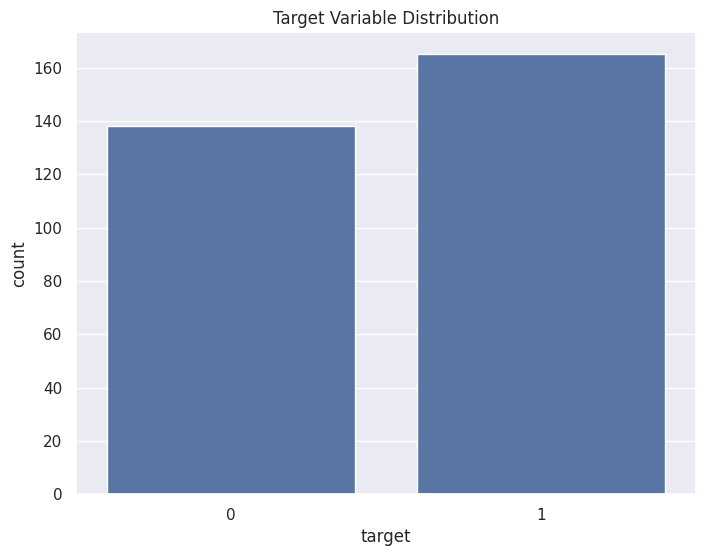

In [189]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="target", data=data)
target_temp = data["target"].value_counts()
print(target_temp)

ax.set_title("Target Variable Distribution")
ax.set_xlabel("target")
ax.set_ylabel("count")
plt.show()

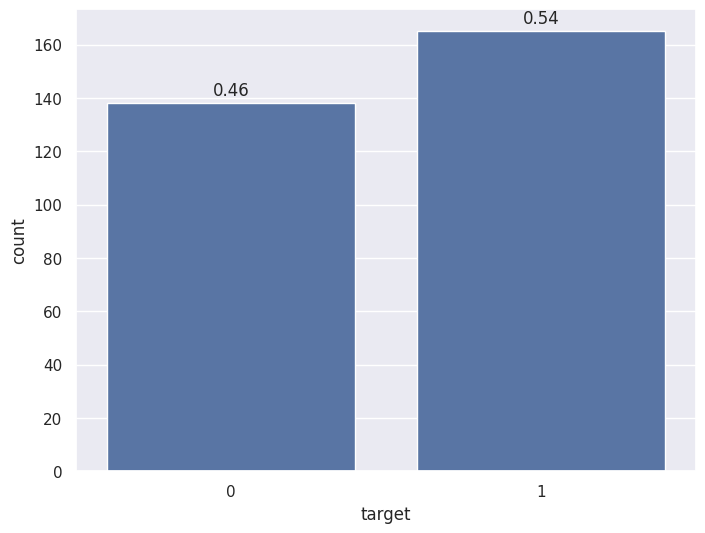

In [190]:
target_temp = data["target"].value_counts()
total = len(data)


plt.figure(figsize=(8, 6))
ax = sns.countplot(x="target", data=data)


for p in ax.patches:
    ax.annotate(f'{p.get_height() / total:.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center')

plt.show()

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

# Percentage of patient with or without heart problems in the given dataset

In [191]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [192]:
data["sex"].unique()

array([1, 0])

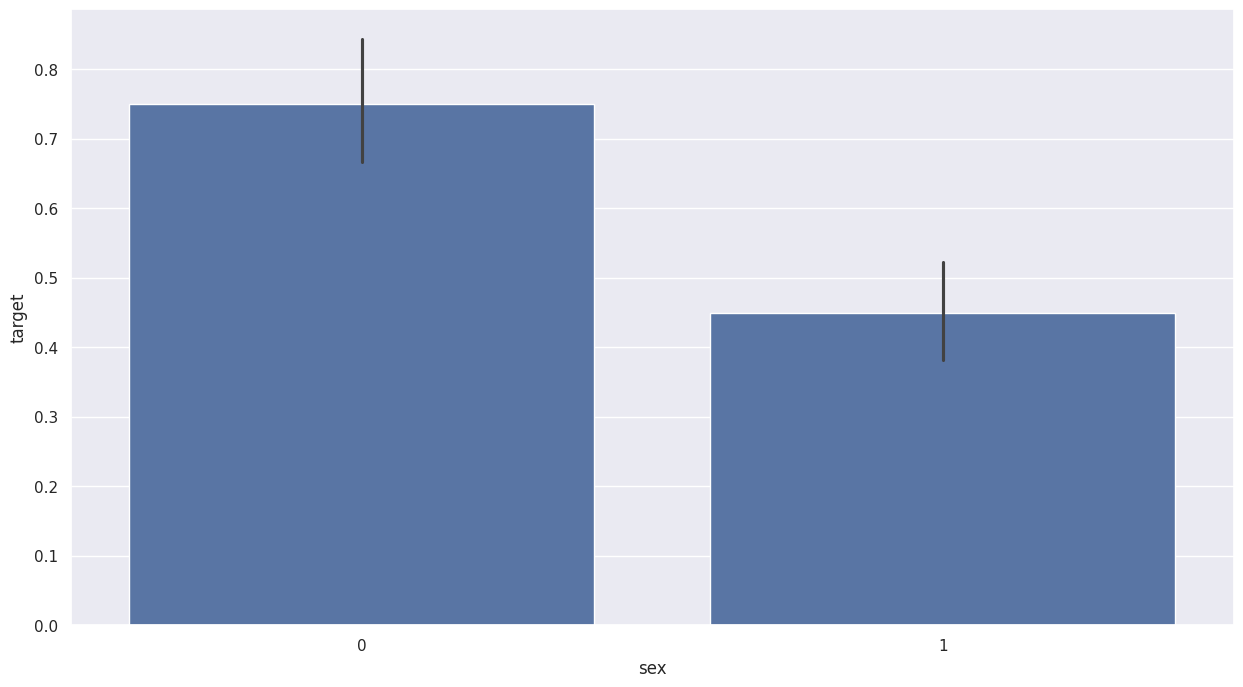

In [193]:
sns.barplot(x="sex", y="target", data=data)
plt.show()

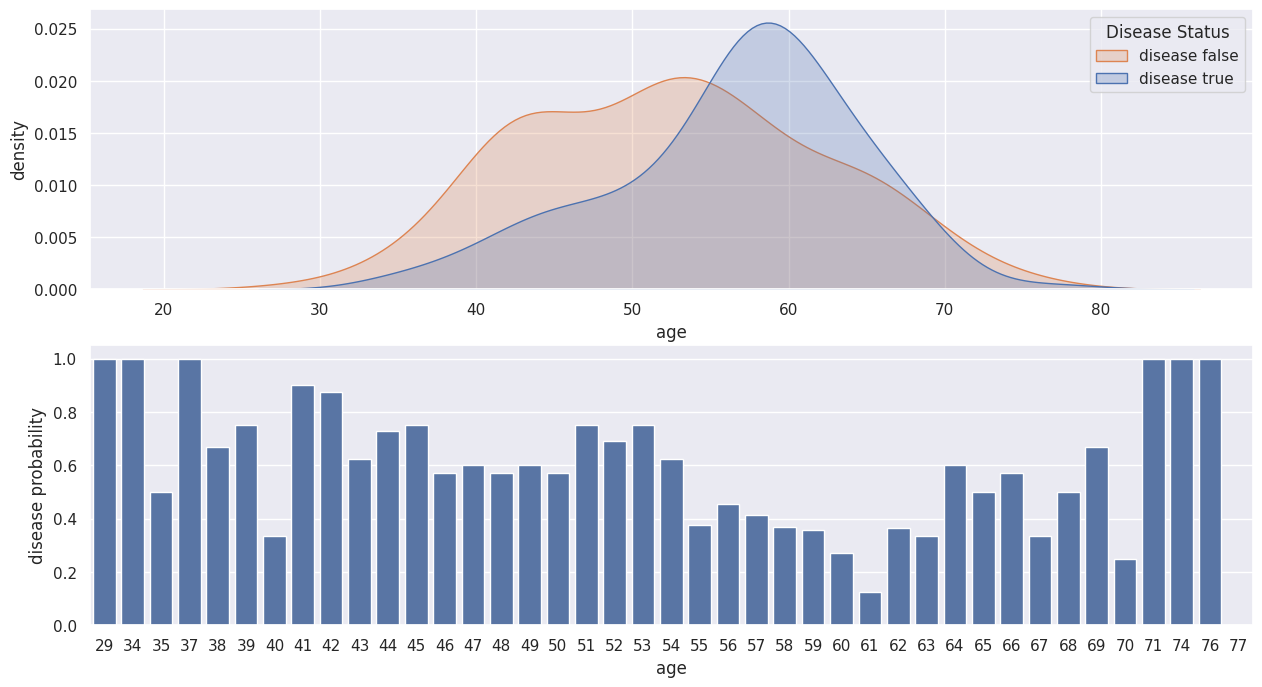

In [194]:
def plotAge():

    sns.kdeplot(data=data, x="age", hue="target", shade=True, ax=axes[0])
    axes[0].set(xlabel='age', ylabel='density')
    axes[0].legend(title="Disease Status", labels=['disease false', 'disease true'])

    avg = data[["age", "target"]].groupby(["age"], as_index=False).mean()
    sns.barplot(x="age", y="target", data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge()
plt.show()

### Here 0 is female and 1 is male patients

In [195]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [196]:
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [197]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [198]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


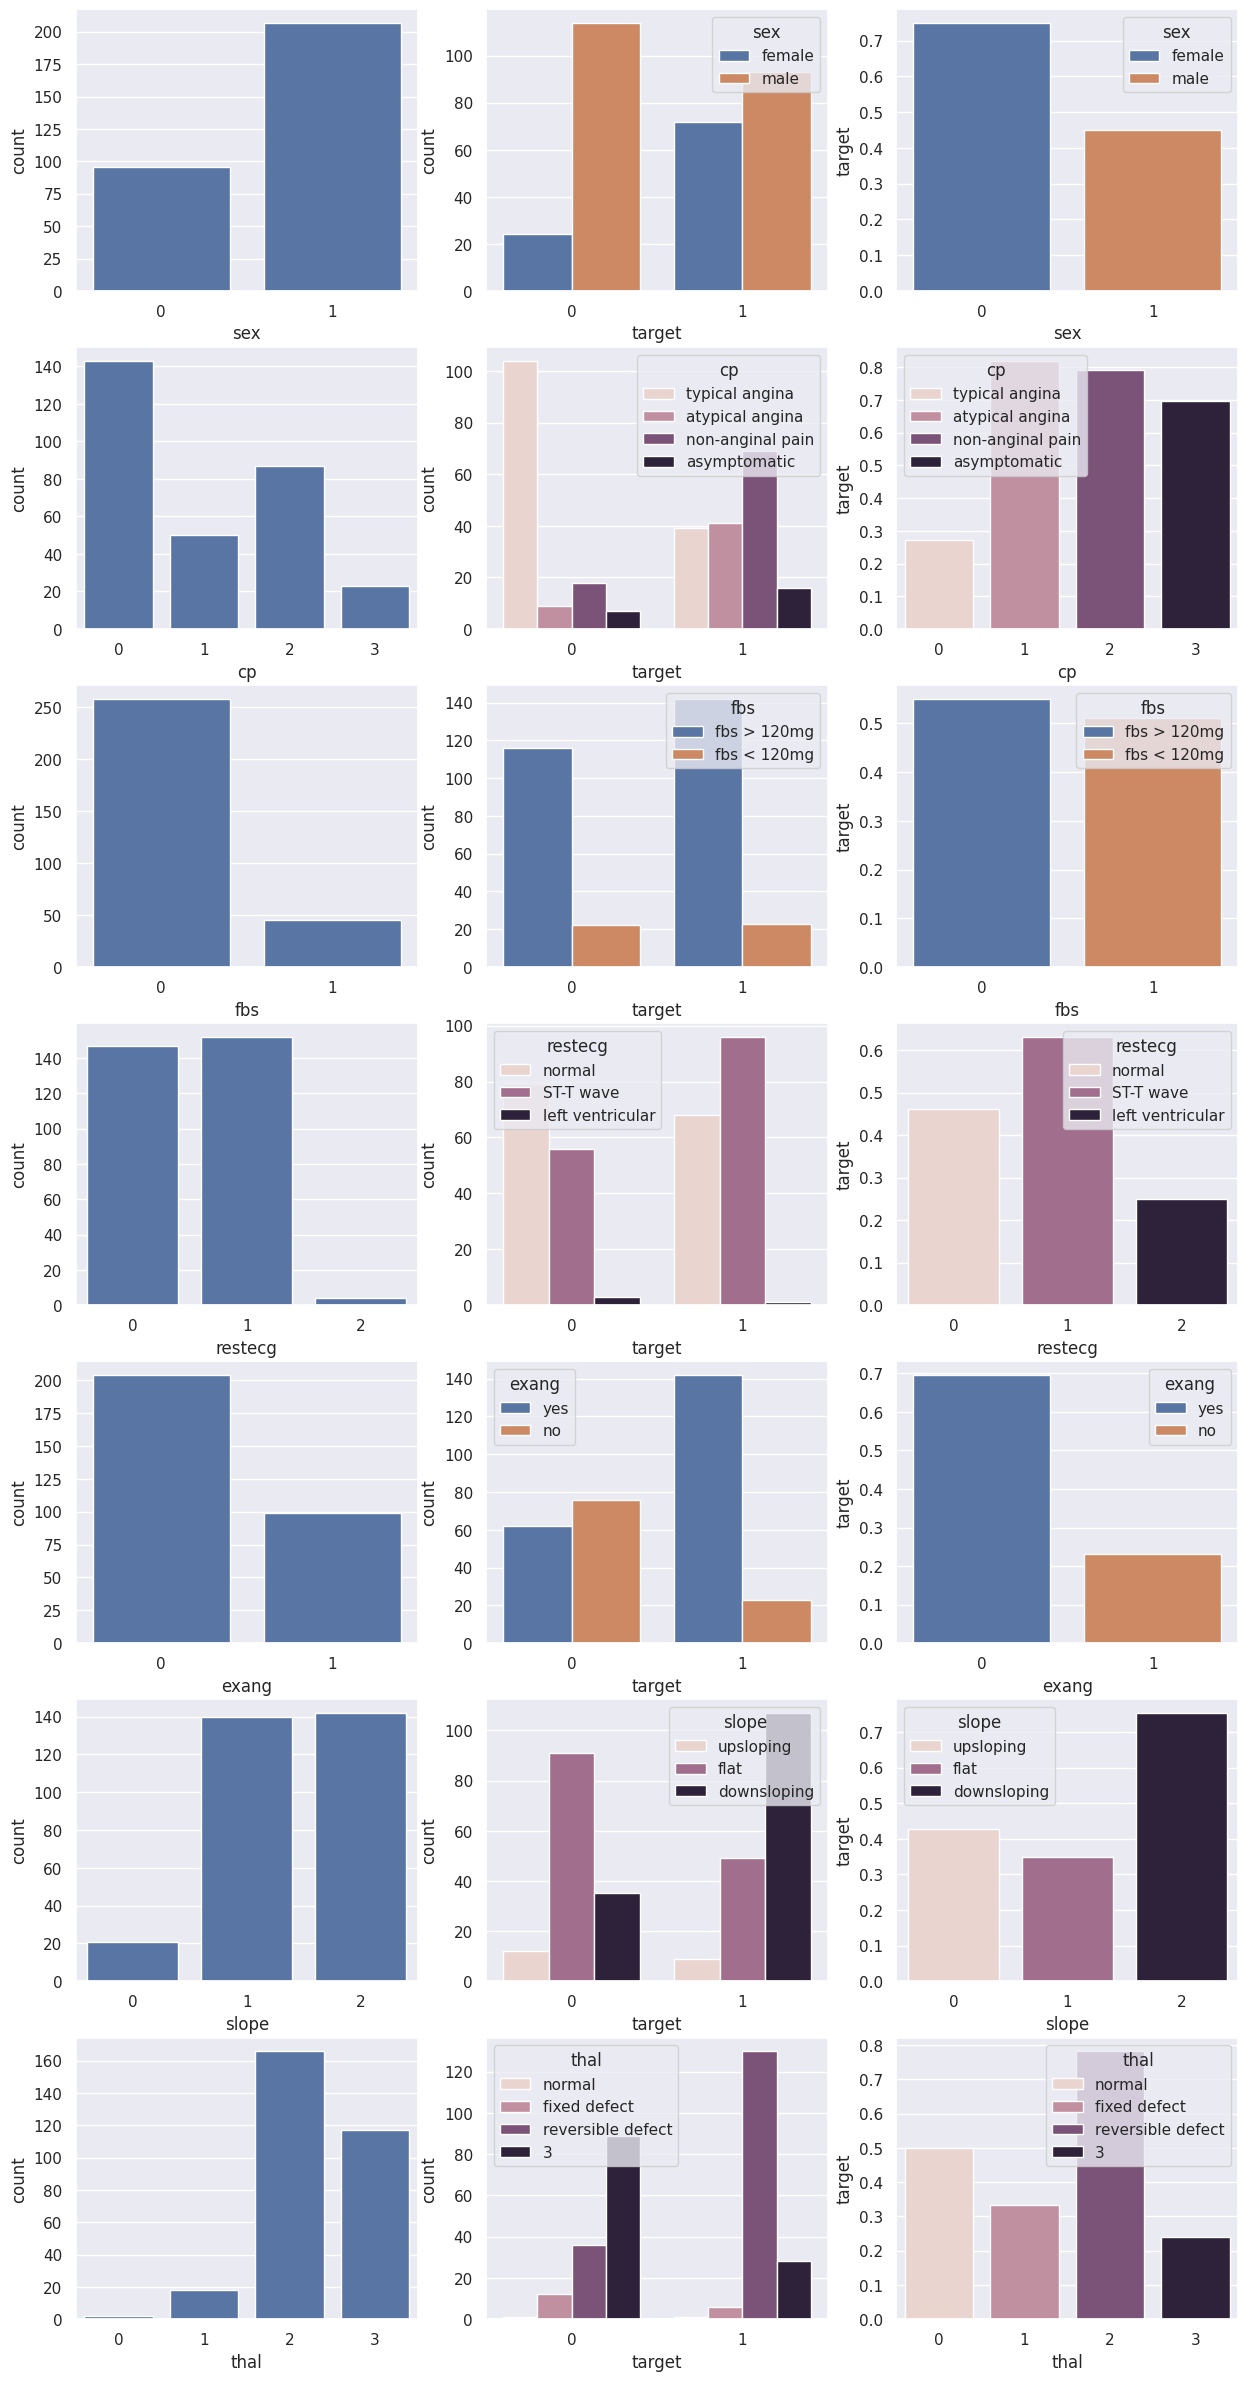

In [199]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [200]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalach', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [201]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

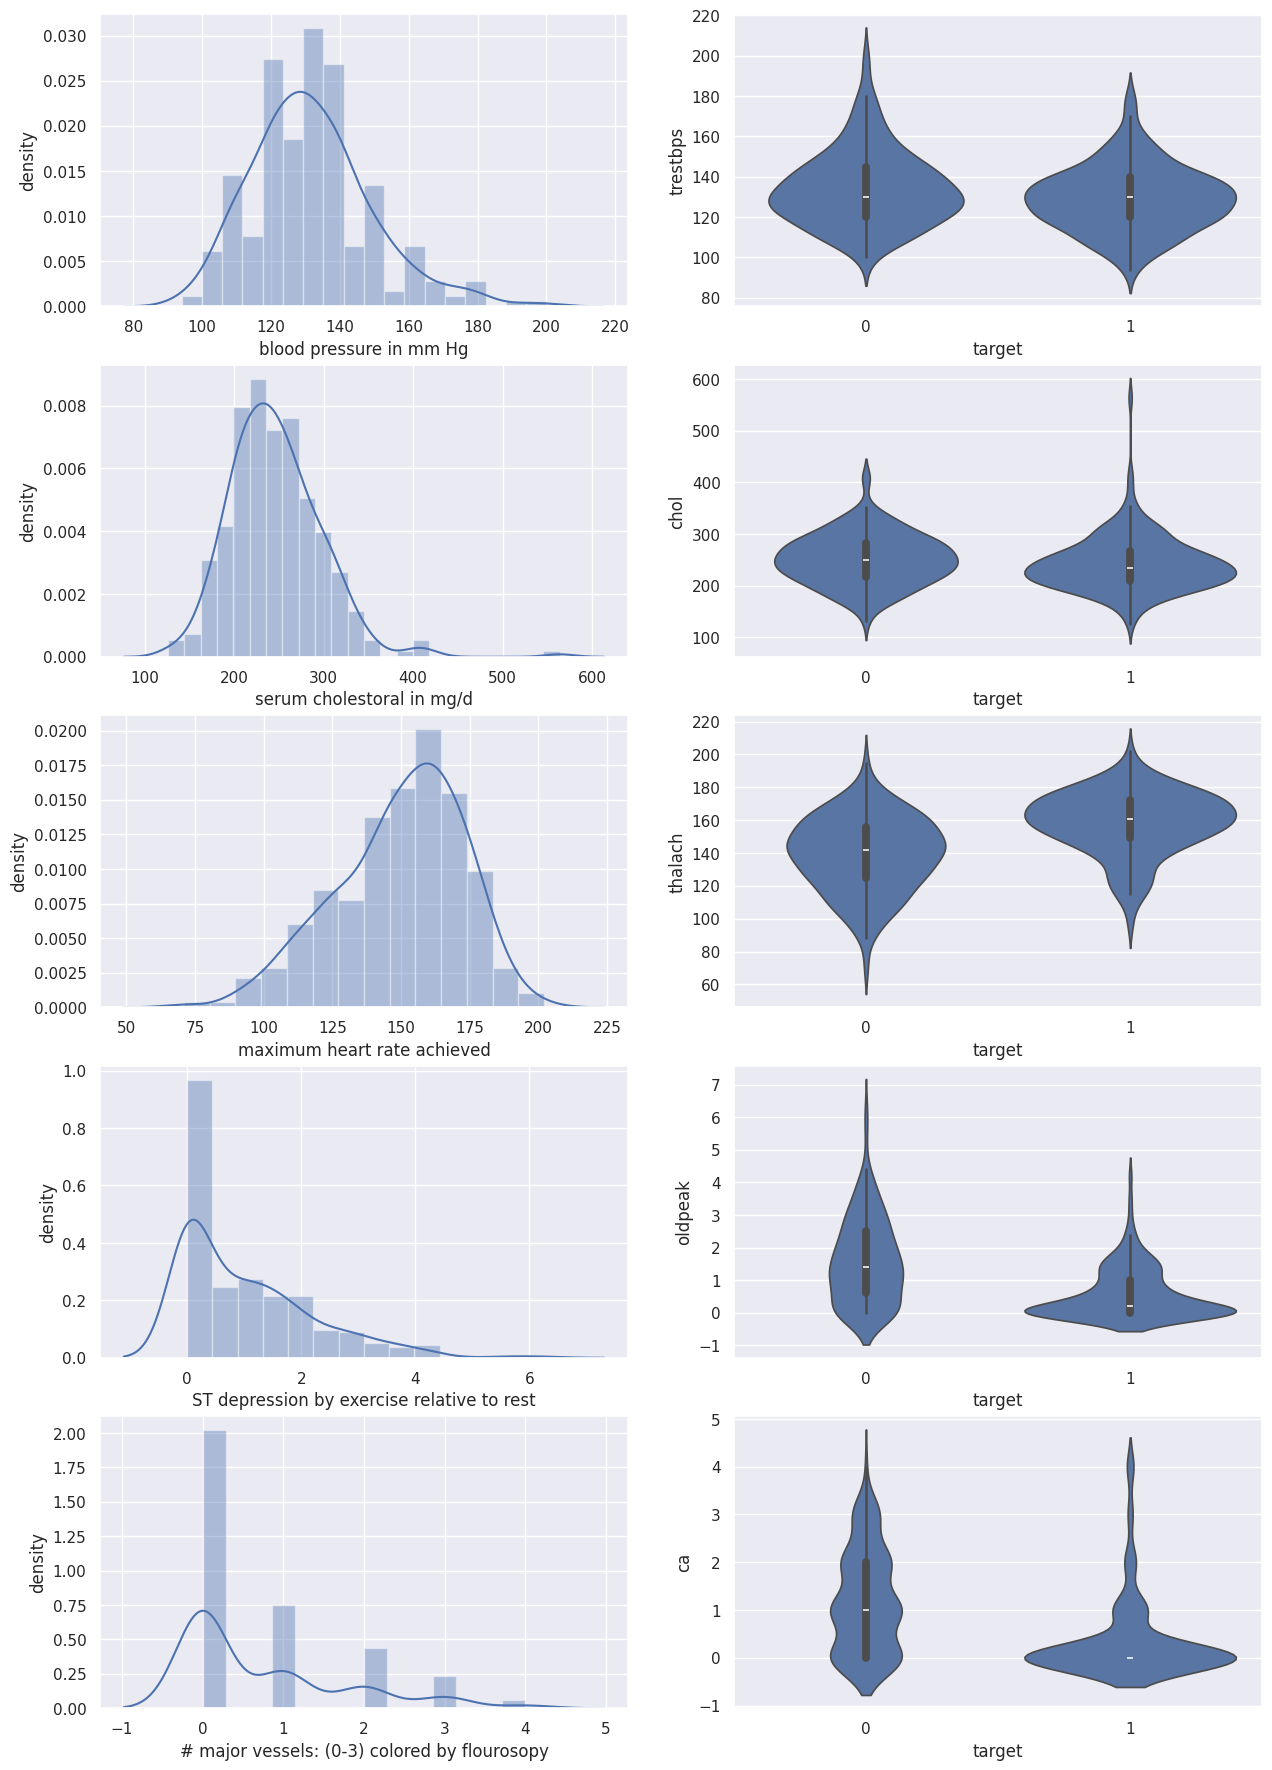

In [202]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Heart Disease Frequency for ages

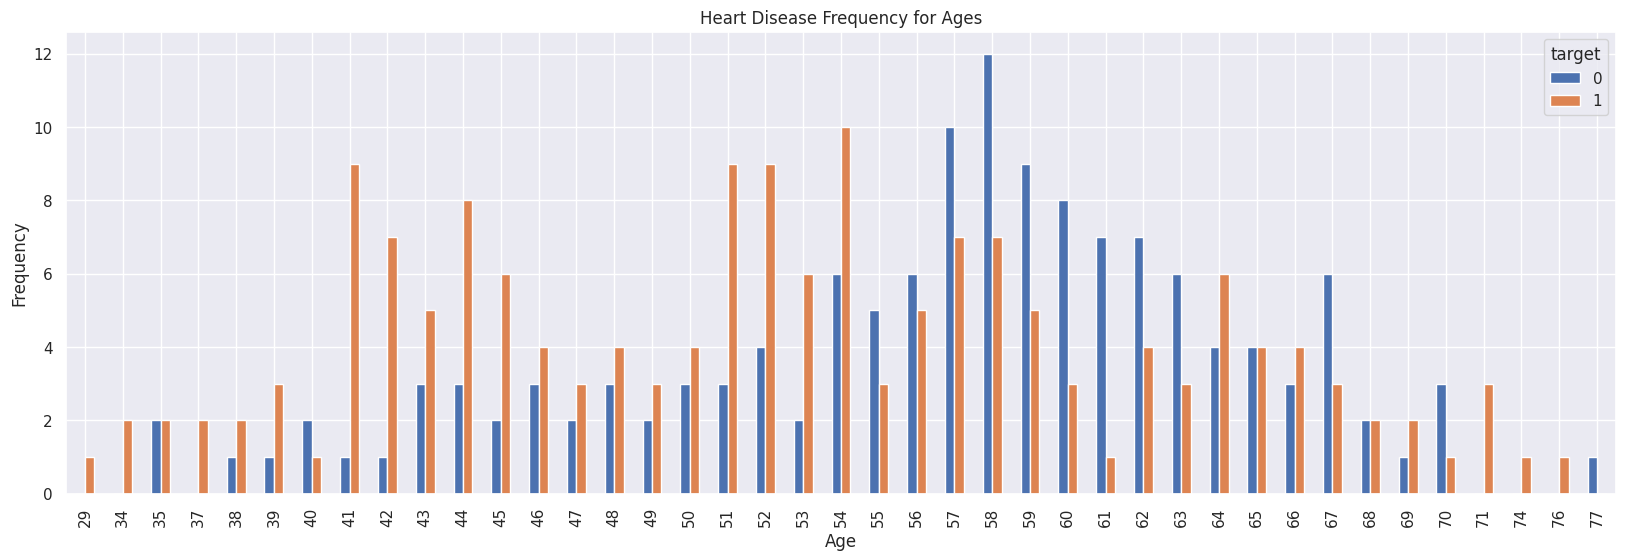

In [203]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

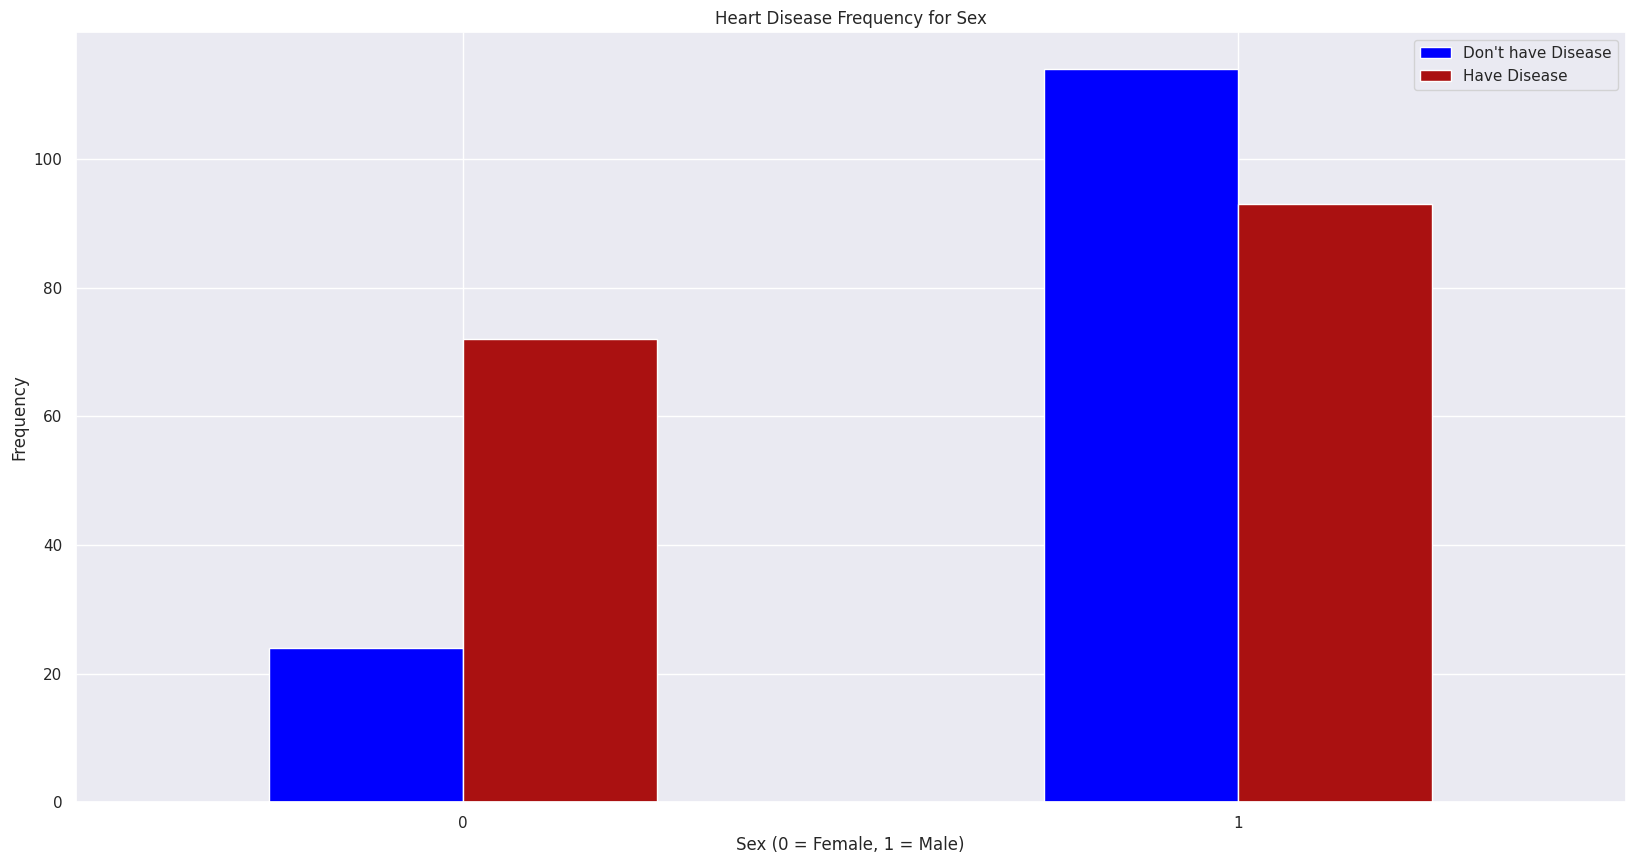

In [204]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

run this line after prediction

In [205]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [206]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heart disease according to Fasting Blood sugar

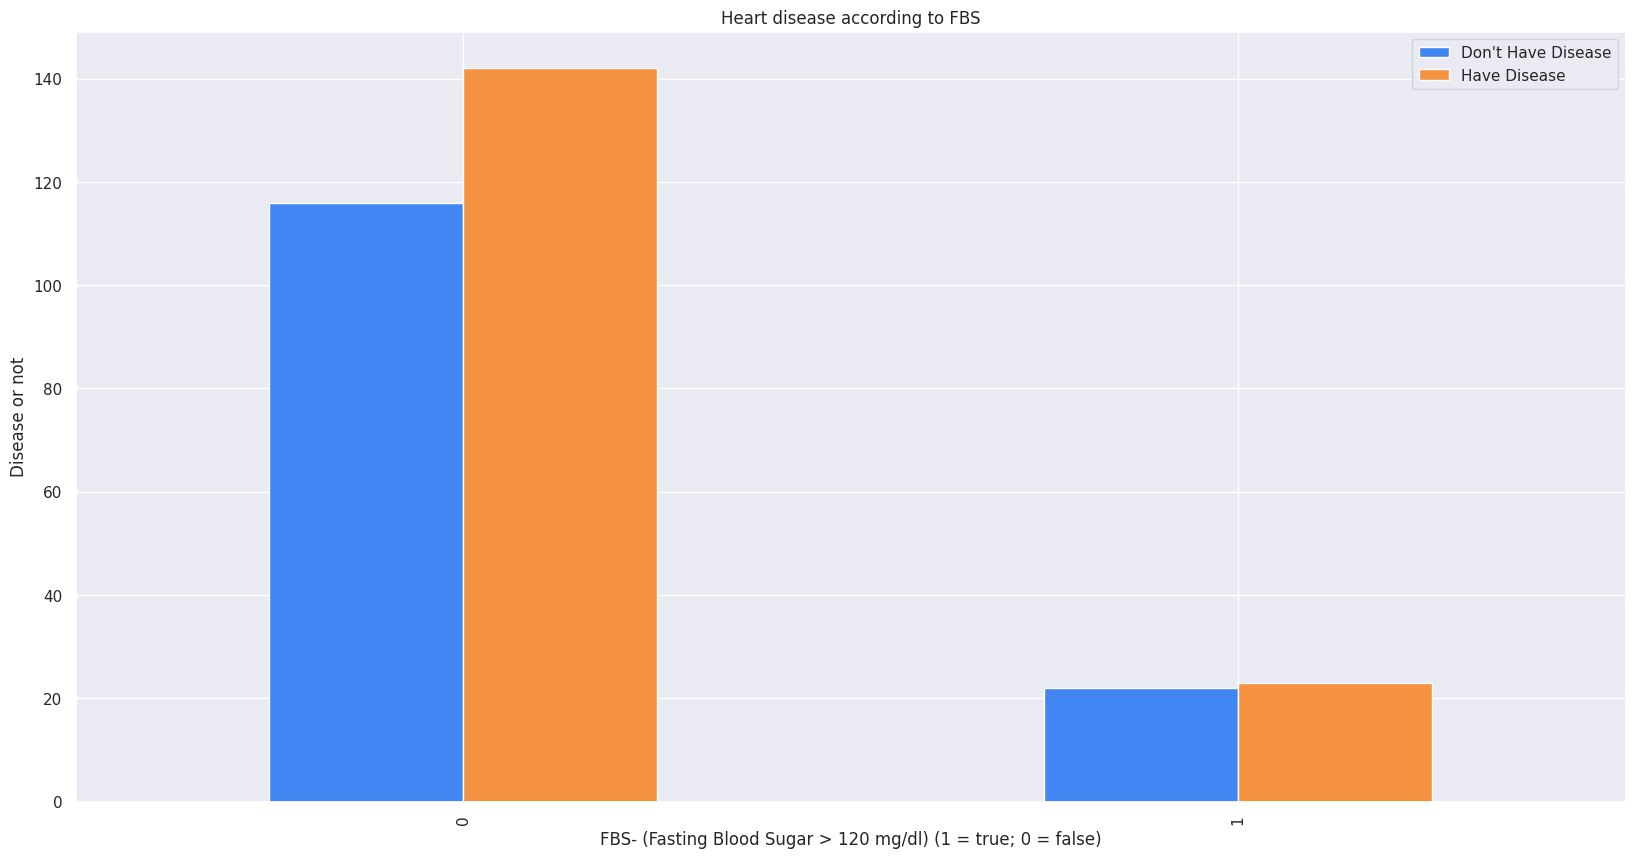

In [207]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [208]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0])

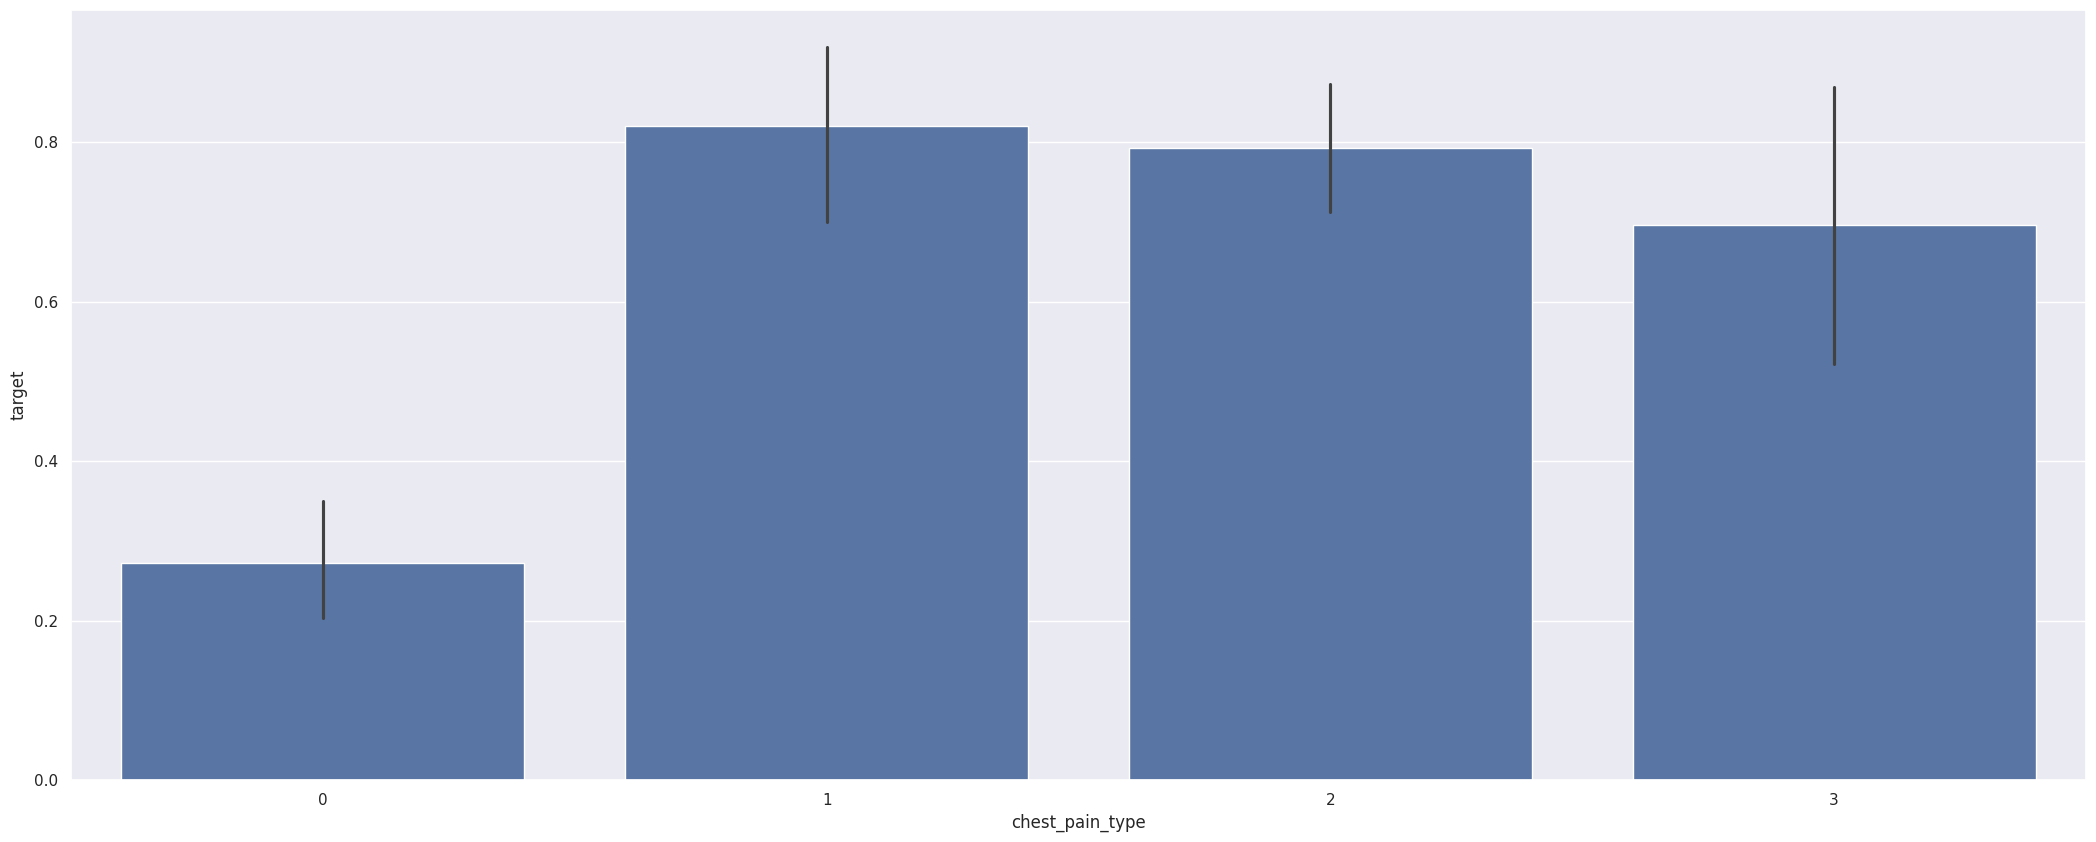

In [209]:
plt.figure(figsize=(26, 10))

sns.barplot(x="chest_pain_type", y="target", data=data)

plt.show()

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [210]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

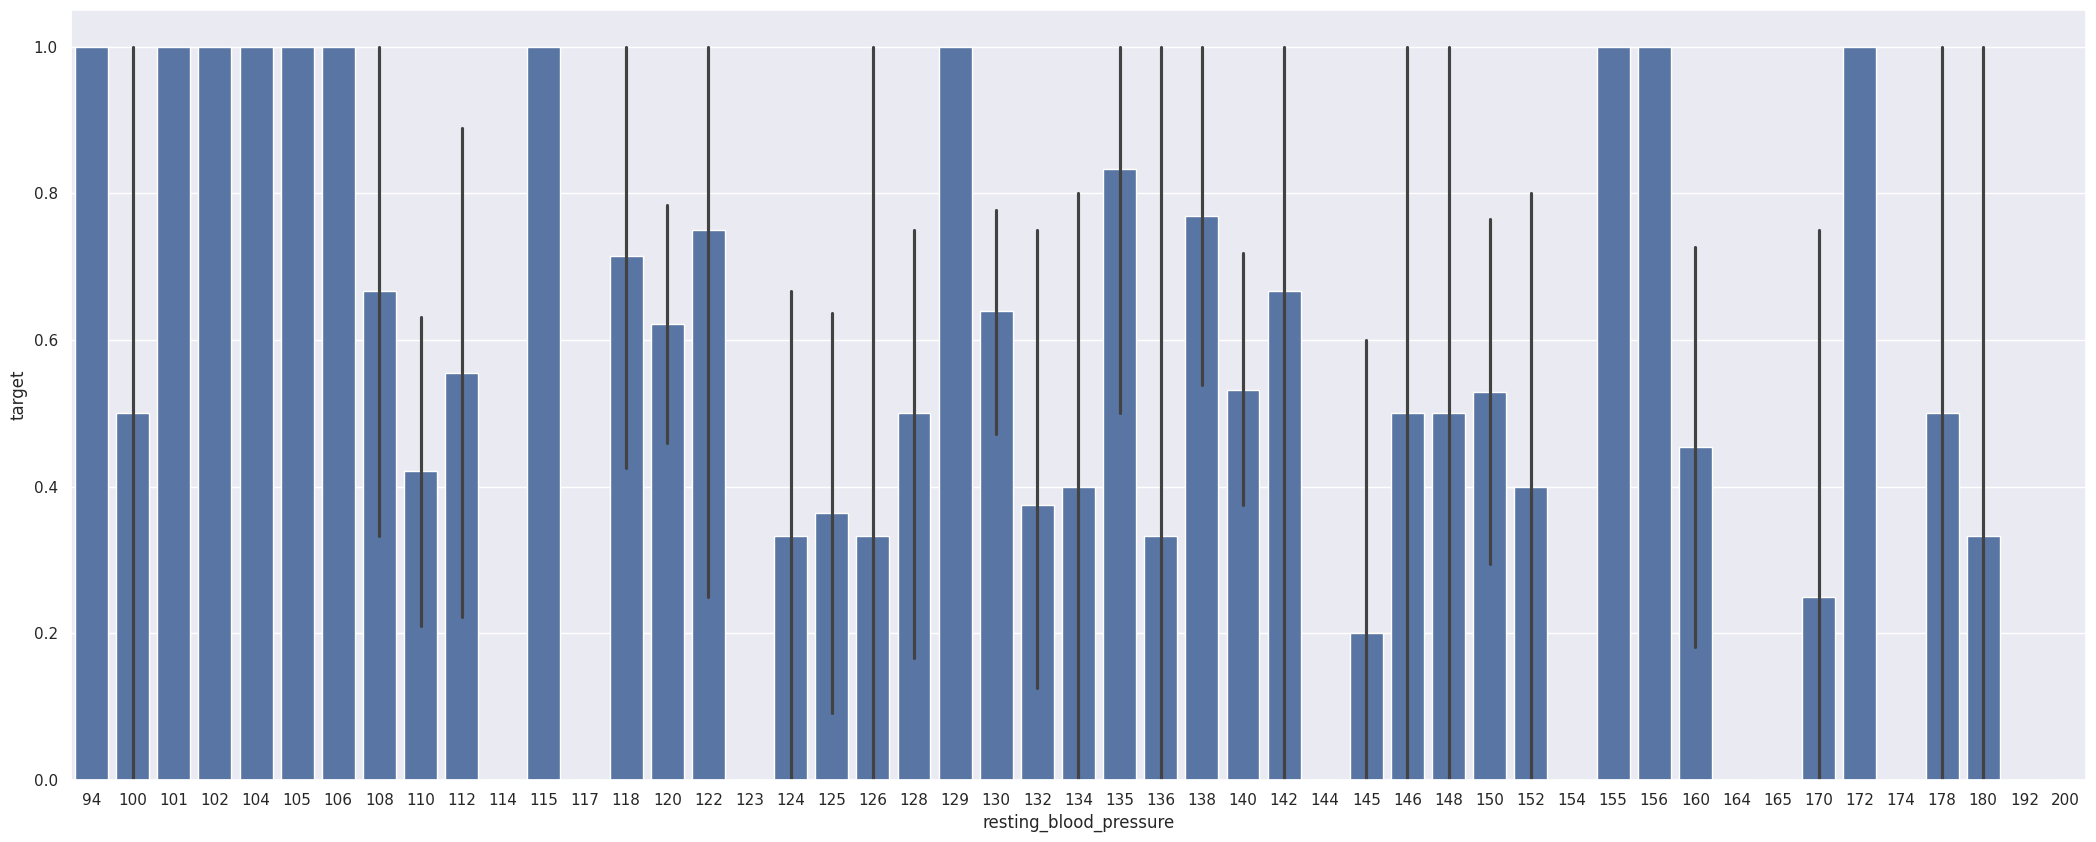

In [211]:
plt.figure(figsize=(26, 10))

sns.barplot(x="resting_blood_pressure", y="target", data=data)

plt.show()

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [212]:
data["rest_ecg"].unique()

array([0, 1, 2])

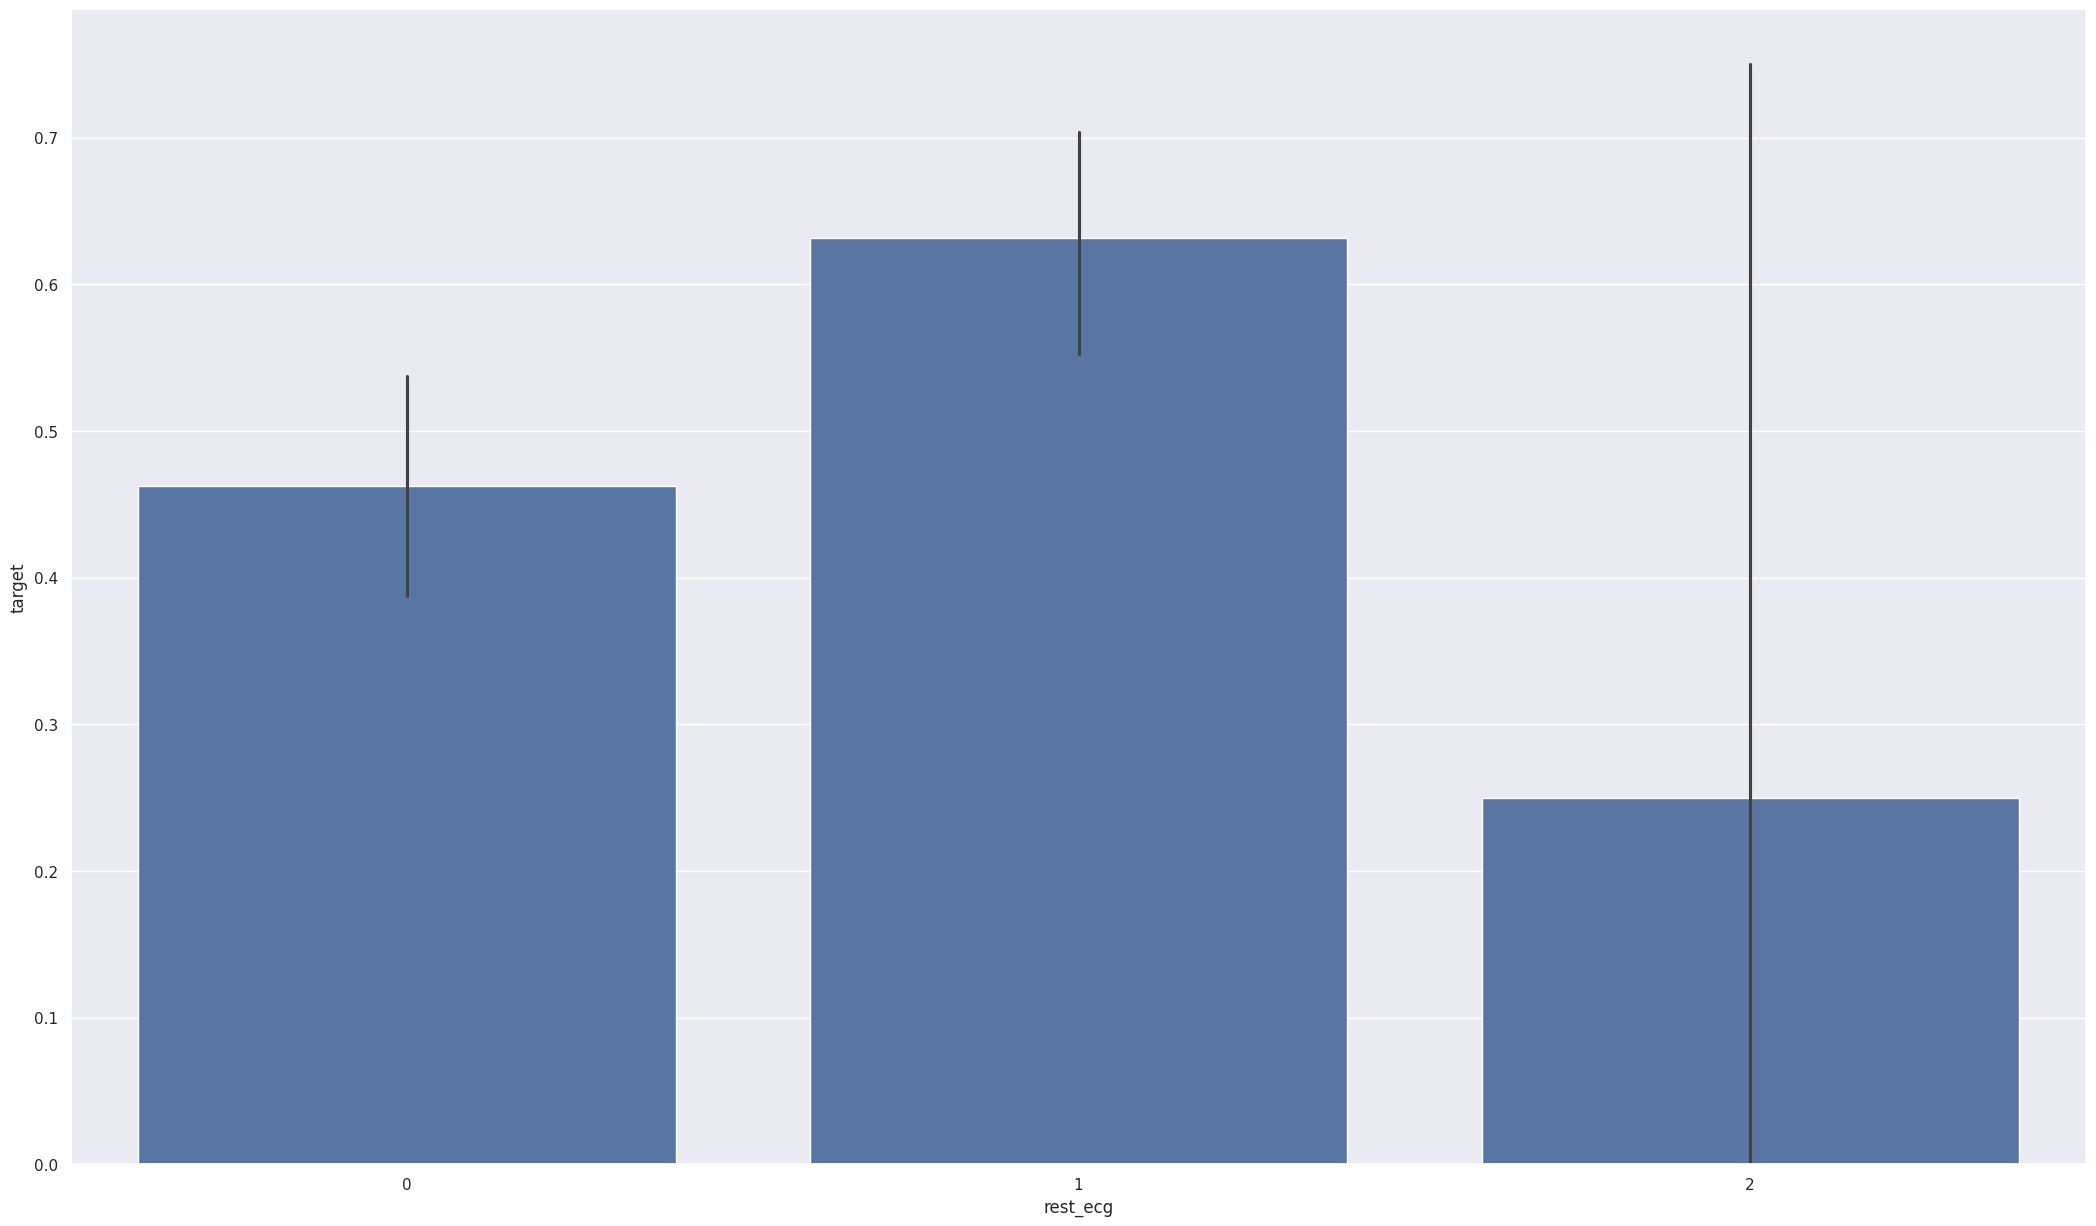

In [213]:
plt.figure(figsize=(26, 15))

sns.barplot(x="rest_ecg", y="target", data=data)

plt.show()

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [214]:
data["exercise_induced_angina"].unique()

array([0, 1])

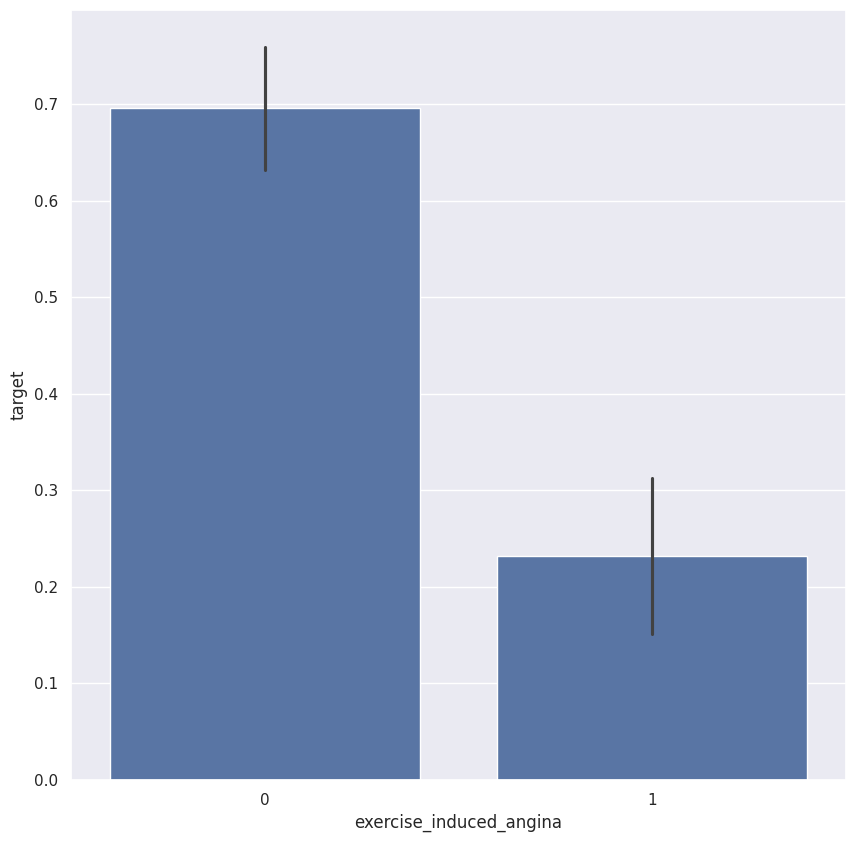

In [215]:
plt.figure(figsize=(10, 10))

sns.barplot(x="exercise_induced_angina", y="target", data=data)

plt.show()

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [216]:
data["st_slope"].unique()

array([0, 2, 1])

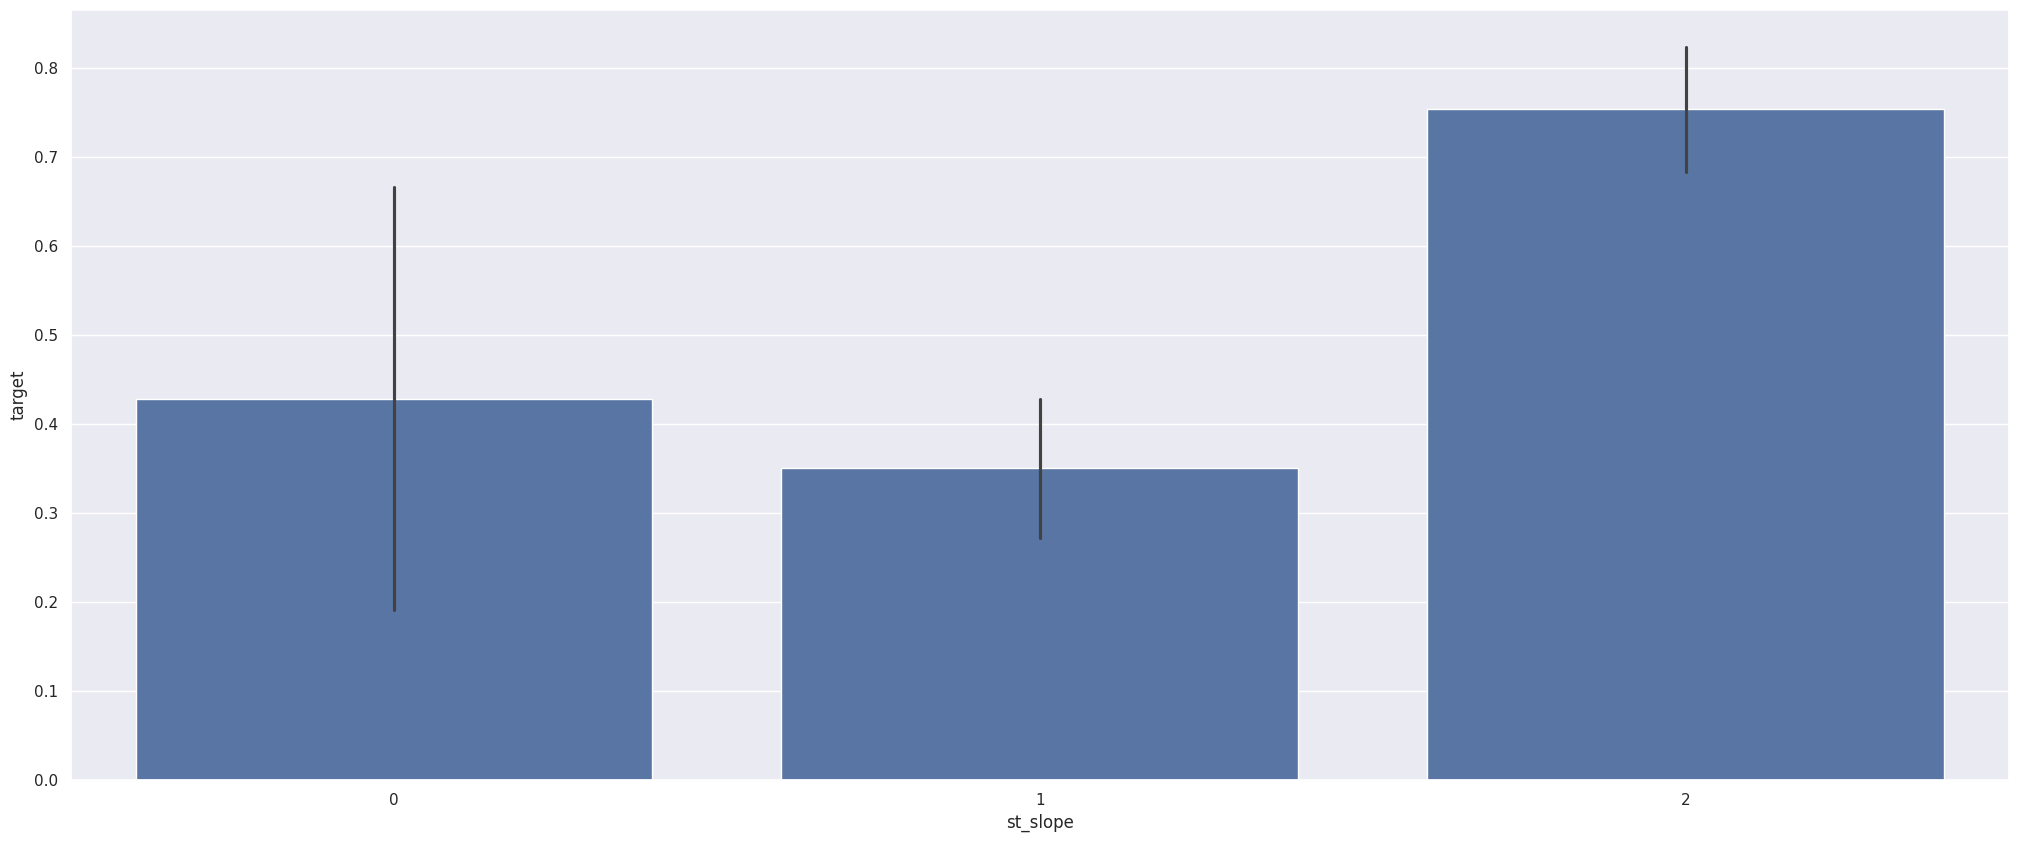

In [217]:
plt.figure(figsize=(25, 10))

sns.barplot(x="st_slope", y="target", data=data)

plt.show()

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [218]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4])

### count num_major vessels

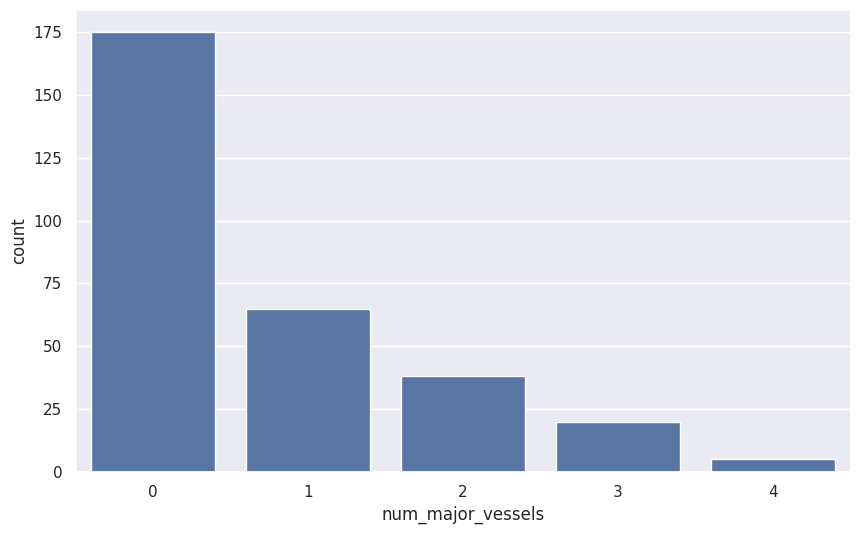

In [219]:
plt.figure(figsize=(10, 6))

sns.countplot(x="num_major_vessels", data=data)

plt.show()

### comparing with target

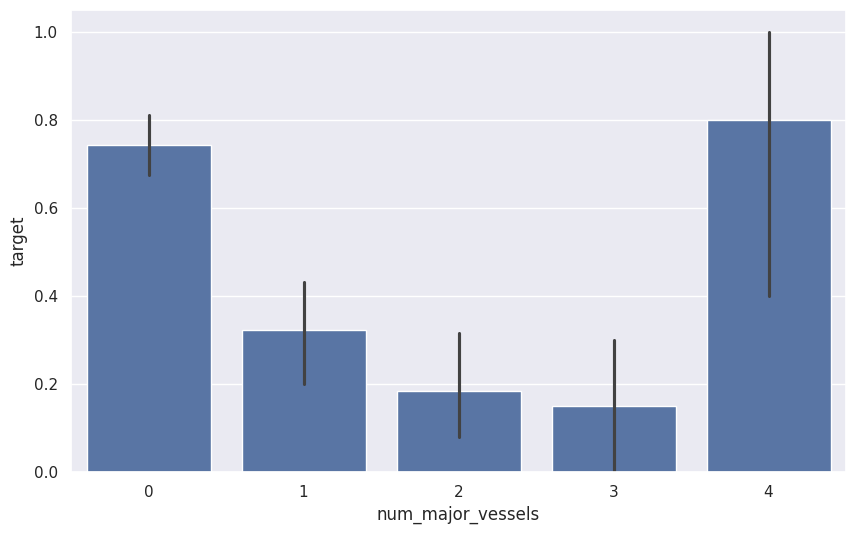

In [220]:
plt.figure(figsize=(10, 6))

sns.barplot(x="num_major_vessels", y="target", data=data)

plt.show()

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [221]:
data["thalassemia"].unique()

array([1, 2, 3, 0])

### plotting the thalassemia distribution (0,1,2,3)

<Axes: xlabel='thalassemia', ylabel='Density'>

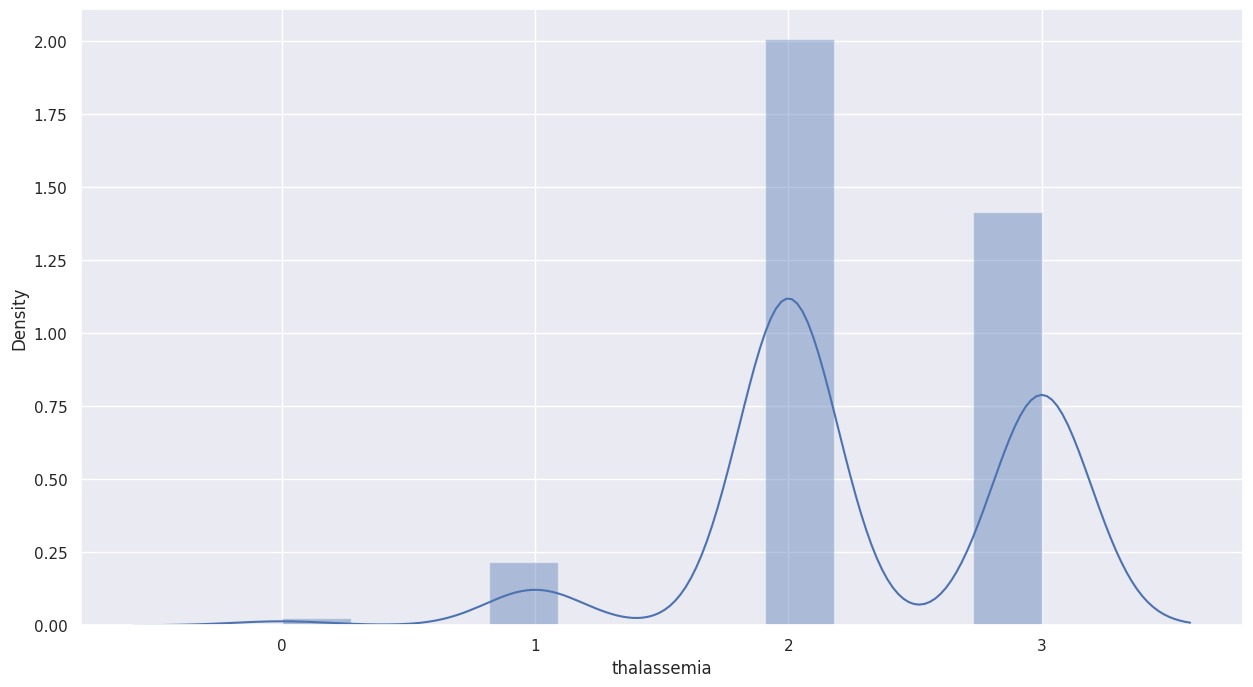

In [222]:
sns.distplot(data["thalassemia"])

### comparing with target

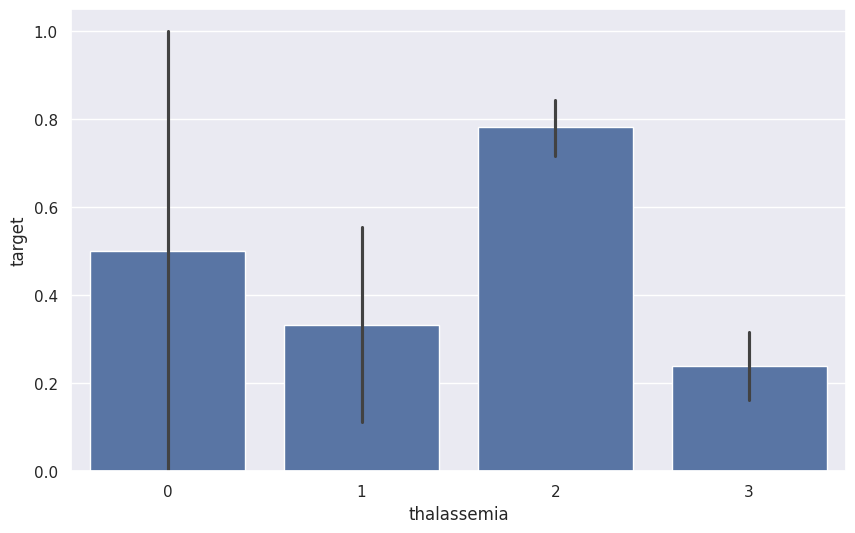

In [223]:
plt.figure(figsize=(10, 6))

sns.barplot(x="thalassemia", y="target", data=data)

plt.show()

# thalassemia and cholesterol scatterplot

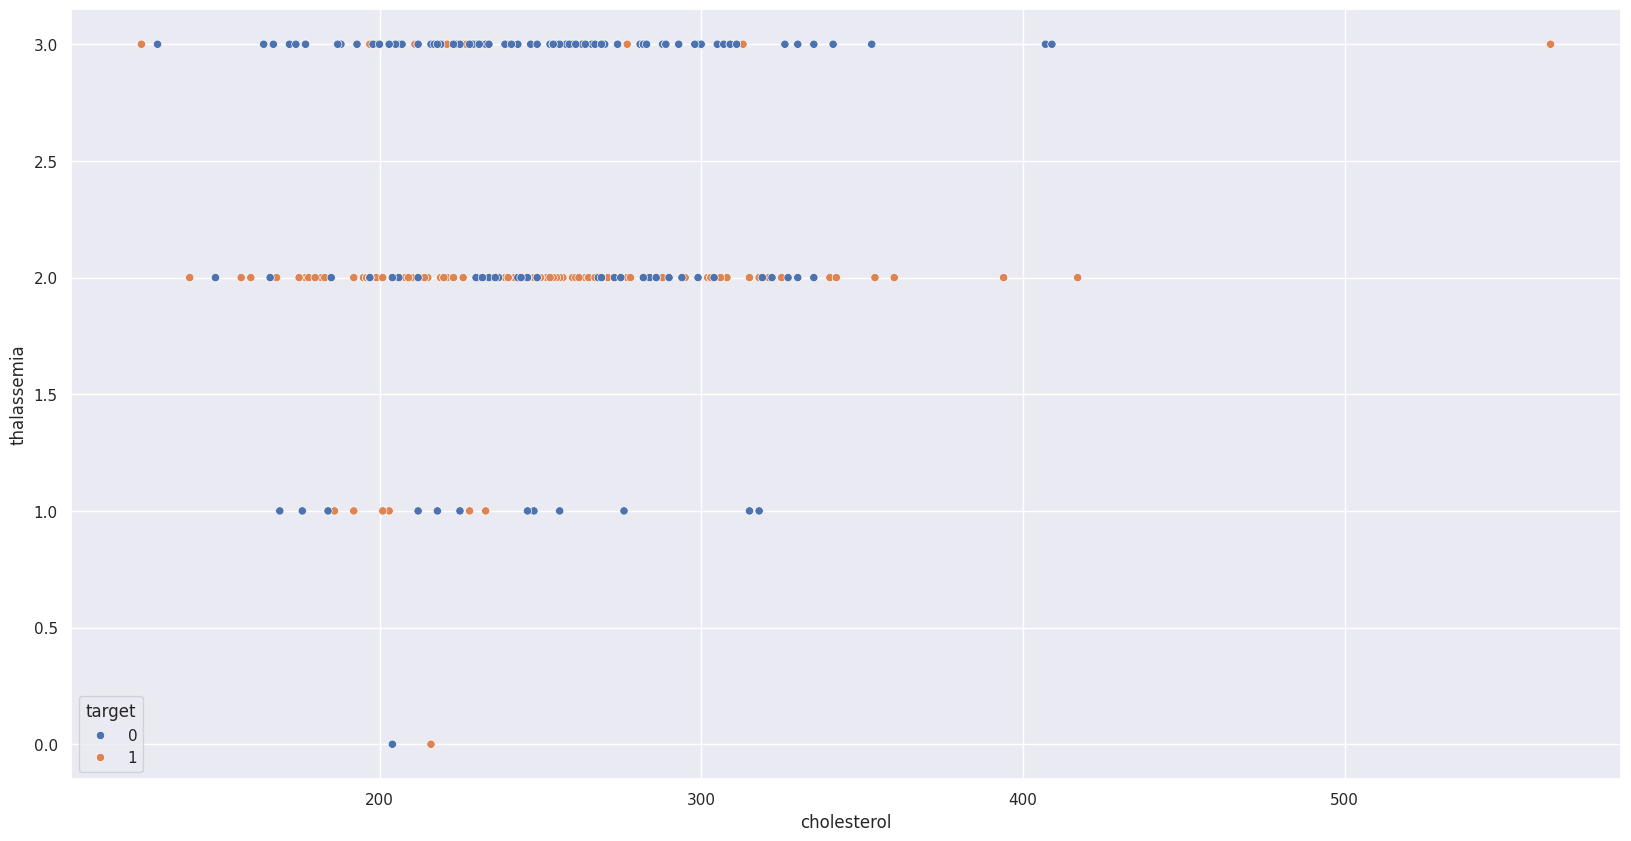

In [224]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

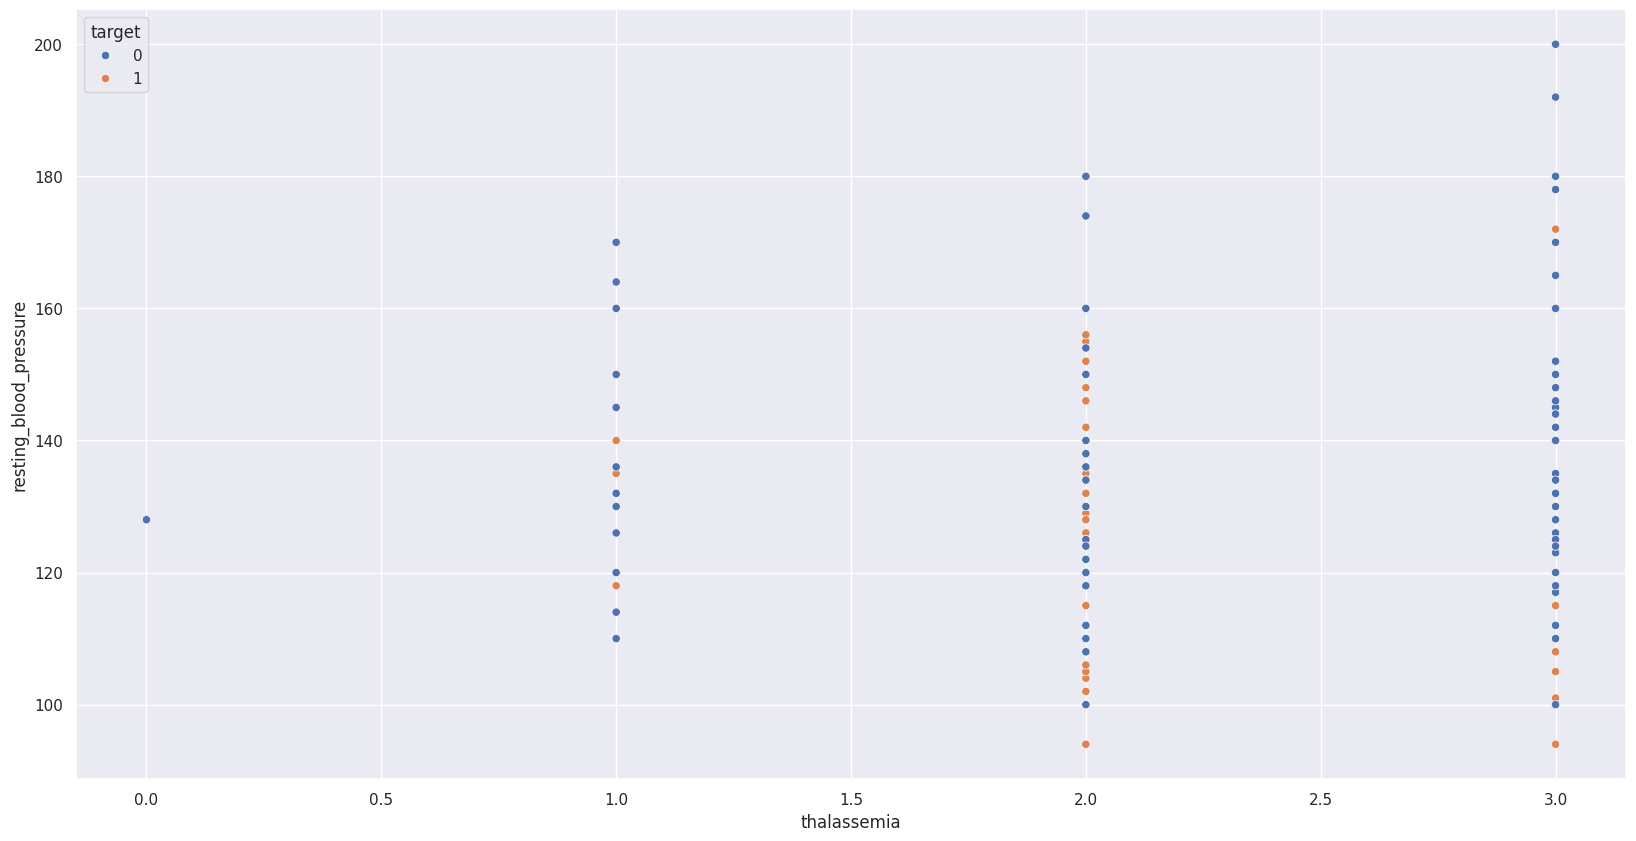

In [225]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

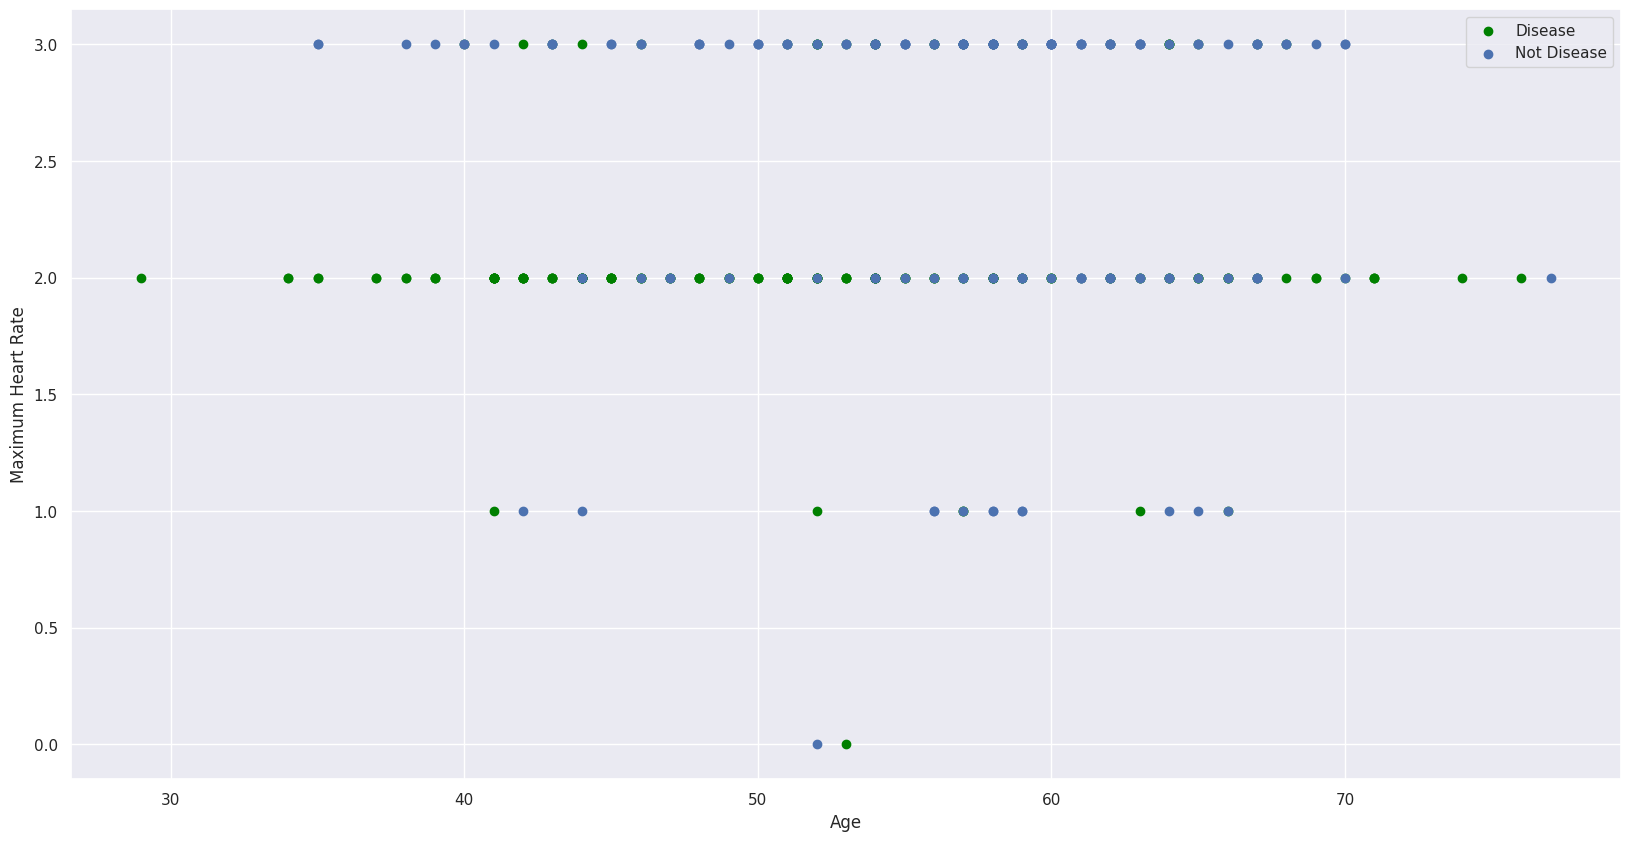

In [226]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

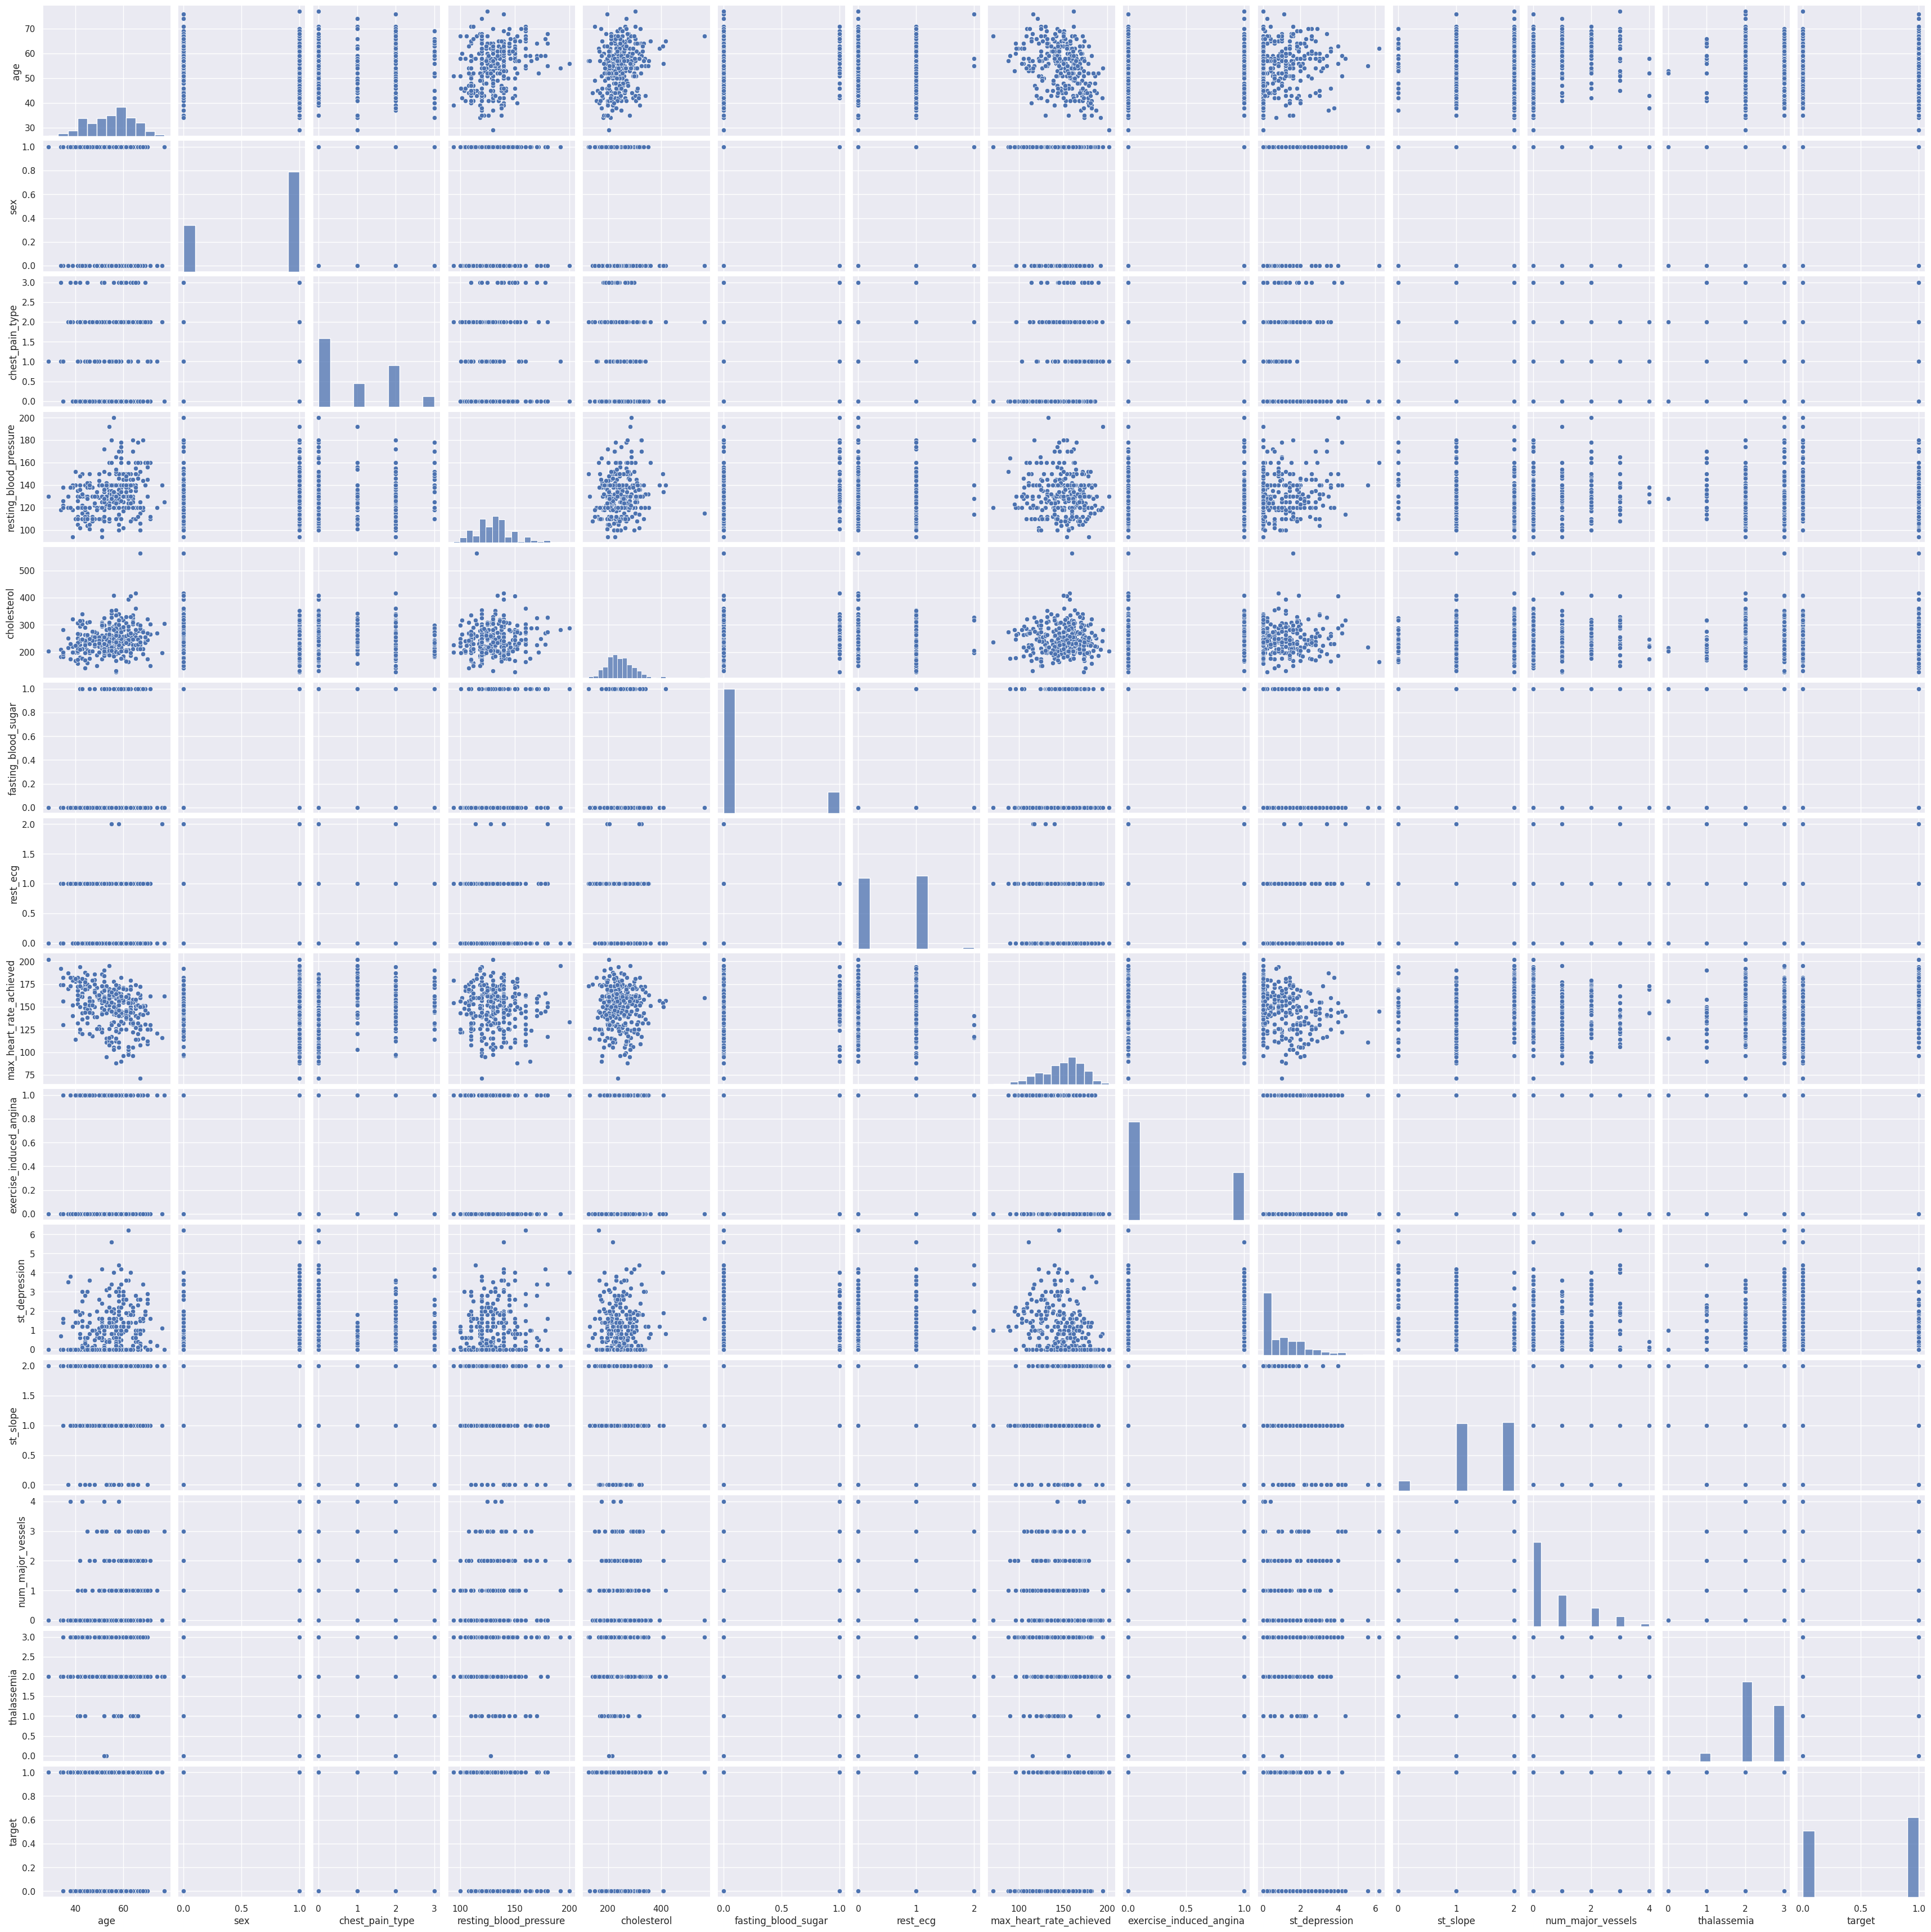

In [227]:
sns.pairplot(data=data)

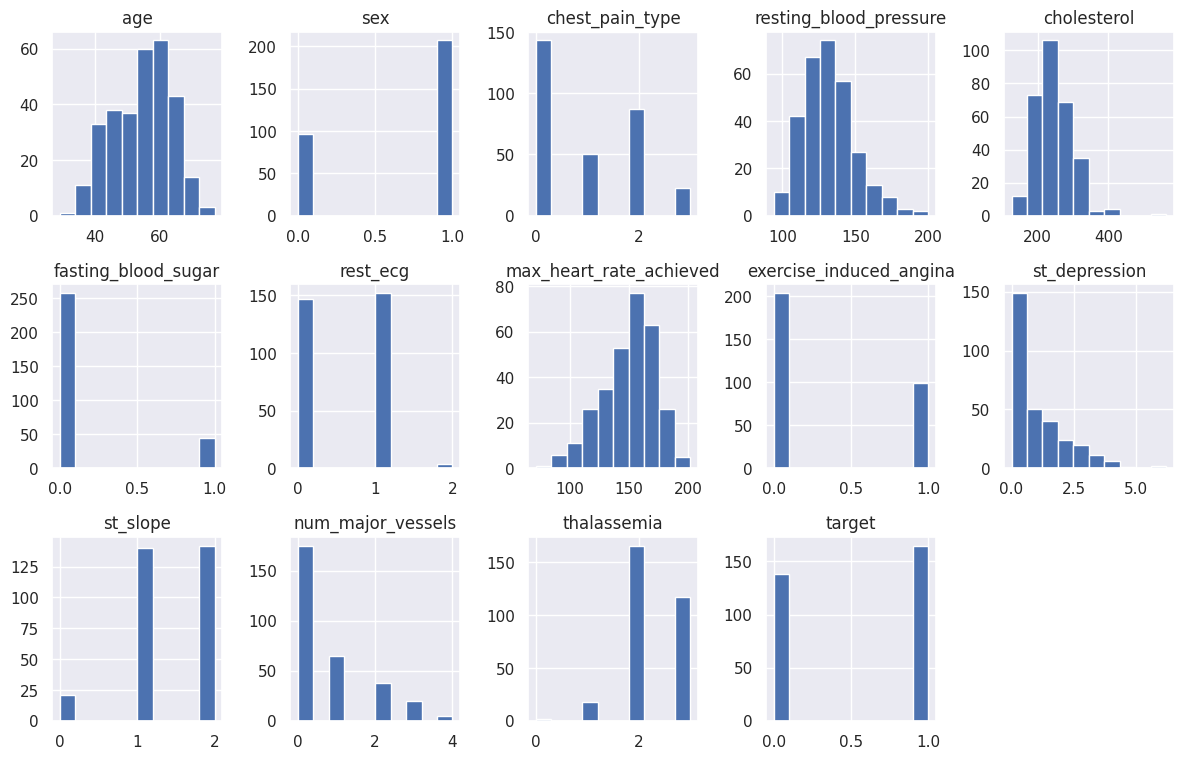

In [228]:
data.hist(figsize=(12, 10), layout=(4, 5))
plt.tight_layout()
plt.show()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [229]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

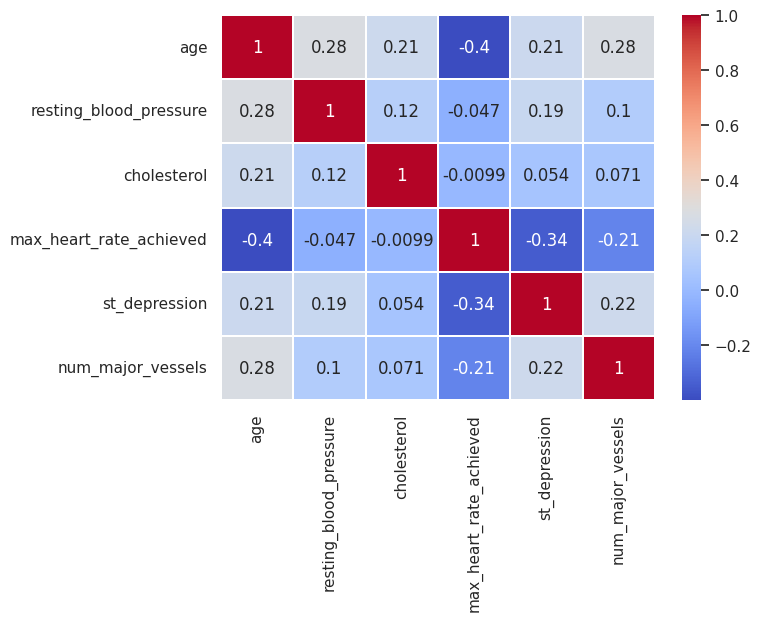

In [230]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [231]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# Splitting the dataset to Train and Test

In [232]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [233]:
X_train.shape

(242, 13)

In [234]:
X_test.shape

(61, 13)

In [235]:
Y_train.shape

(242,)

In [236]:
Y_test.shape

(61,)

## importing Accuracy score

In [237]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [238]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):


    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

# Logistic regression

In [239]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [240]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [241]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 84.71%
Test accuracy: 85.25%


In [242]:
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')

clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.8524590163934426


# Confusion Matrix

In [243]:
from sklearn.metrics import confusion_matrix

In [244]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<Axes: >

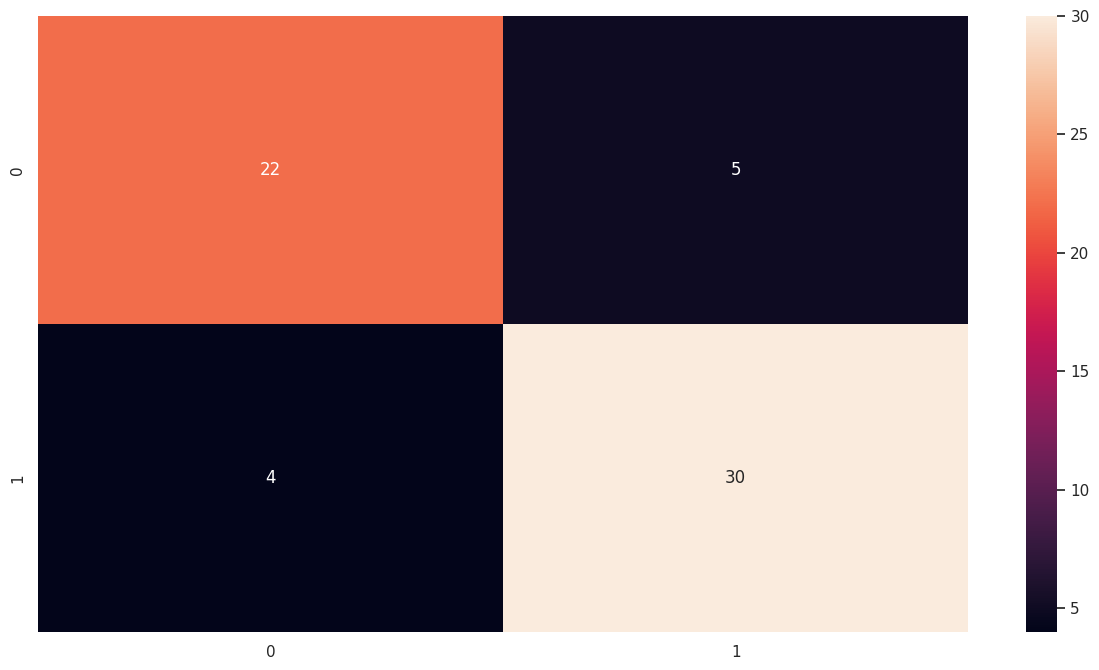

In [245]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [246]:
from sklearn.metrics import precision_score

In [247]:
precision = precision_score(Y_test, y_pred_lr)

In [248]:
print("Precision: ",precision)

Precision:  0.8571428571428571


# Recall

In [249]:
from sklearn.metrics import recall_score

In [250]:
recall = recall_score(Y_test, y_pred_lr)

In [251]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706




---



# F-Score

balance of precision and recall score

In [252]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


cm using bad style

In [253]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,22,5
1,4,30


In [254]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative

In [255]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


# Learning curve for Training score & cross validation score

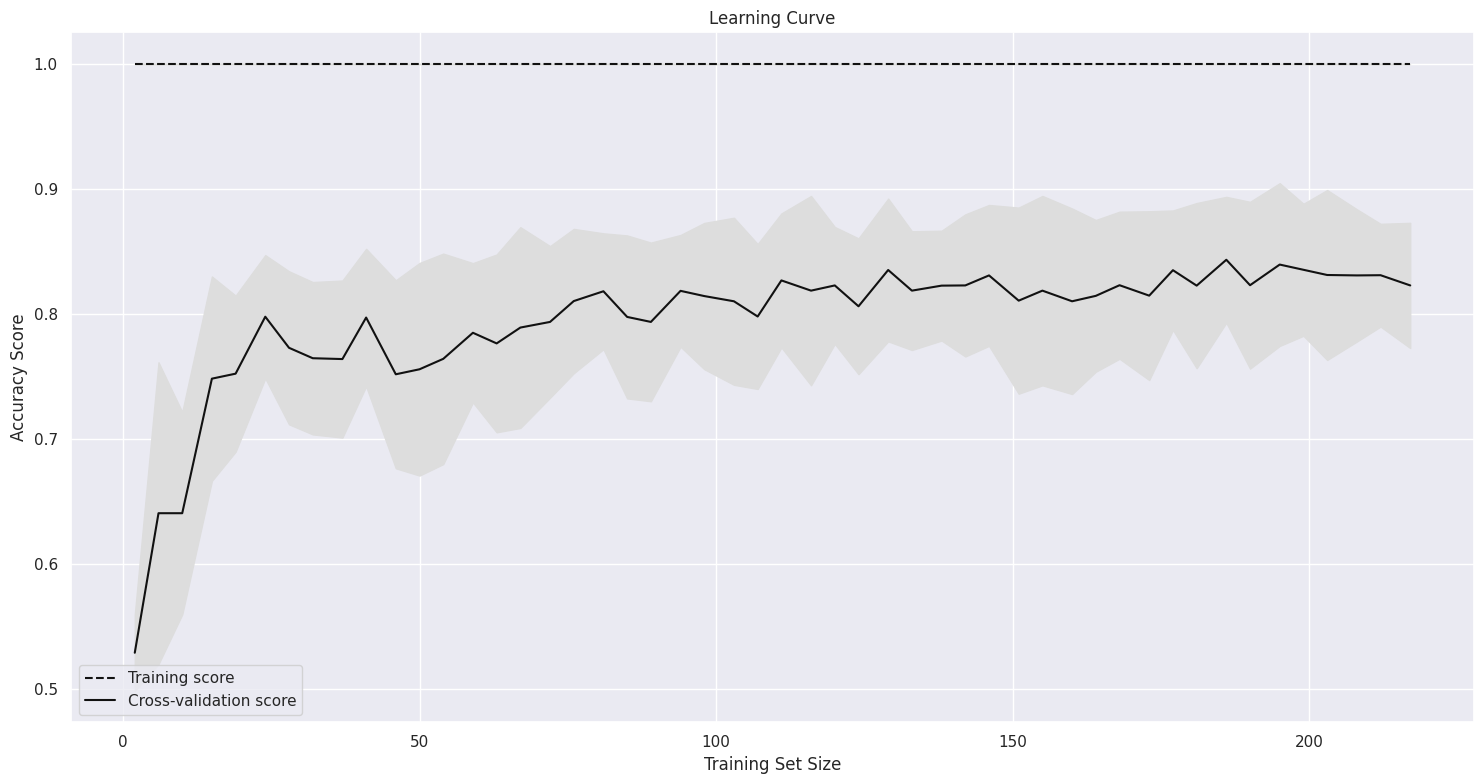

In [257]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [258]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [259]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


Now, let us prune the depth of trees and check the accuracy.

In [260]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [261]:
from sklearn.metrics import confusion_matrix

In [262]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<Axes: >

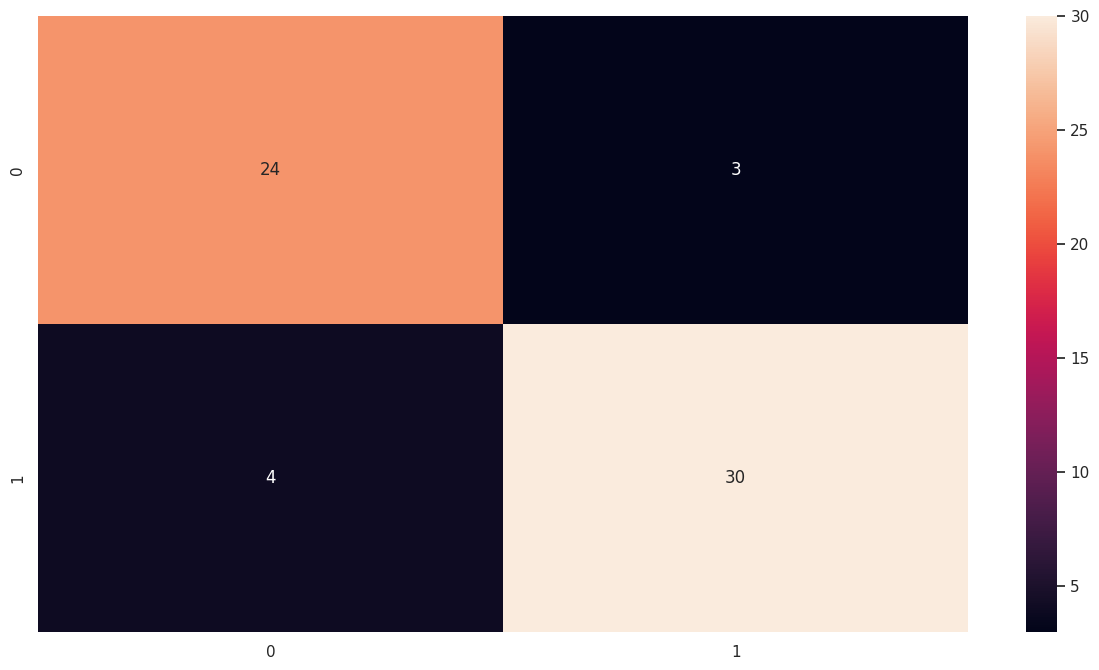

In [263]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [264]:
from sklearn.metrics import precision_score

In [265]:
precision = precision_score(Y_test, y_pred_rf)

In [266]:
print("Precision: ",precision)

Precision:  0.9090909090909091


# recall

In [267]:
from sklearn.metrics import recall_score

In [268]:
recall = recall_score(Y_test, y_pred_rf)

In [269]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


# F score

In [270]:
print((2*precision*recall)/(precision+recall))

0.8955223880597014


### cm using bad style

In [271]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,24,3
1,4,30


In [272]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## False negative rate of the model

In [273]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Naive Bayes

In [274]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [275]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [276]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


## confusion matrix of Naive Bayes

In [277]:
from sklearn.metrics import confusion_matrix

In [278]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

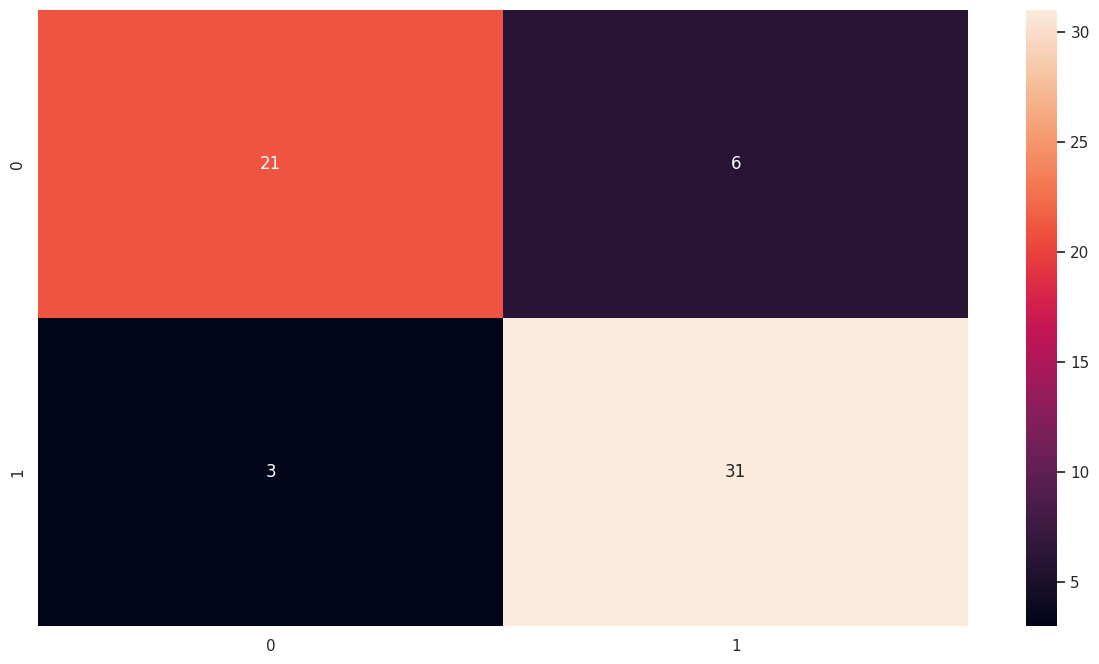

In [279]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [280]:
from sklearn.metrics import precision_score

In [281]:
precision = precision_score(Y_test, y_pred_nb)

In [282]:
print("Precision: ",precision)

Precision:  0.8378378378378378


# recall

In [283]:
from sklearn.metrics import recall_score

In [284]:
recall = recall_score(Y_test, y_pred_nb)

In [285]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


# f score

In [286]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


### bad cm style

In [287]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [288]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [289]:
fnr = FN*100/(FN+TP)
fnr

8.823529411764707

# KNN(K Nearest Neighbors)

In [290]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [291]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [292]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [293]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 60.66%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [294]:
from sklearn.metrics import confusion_matrix

In [295]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

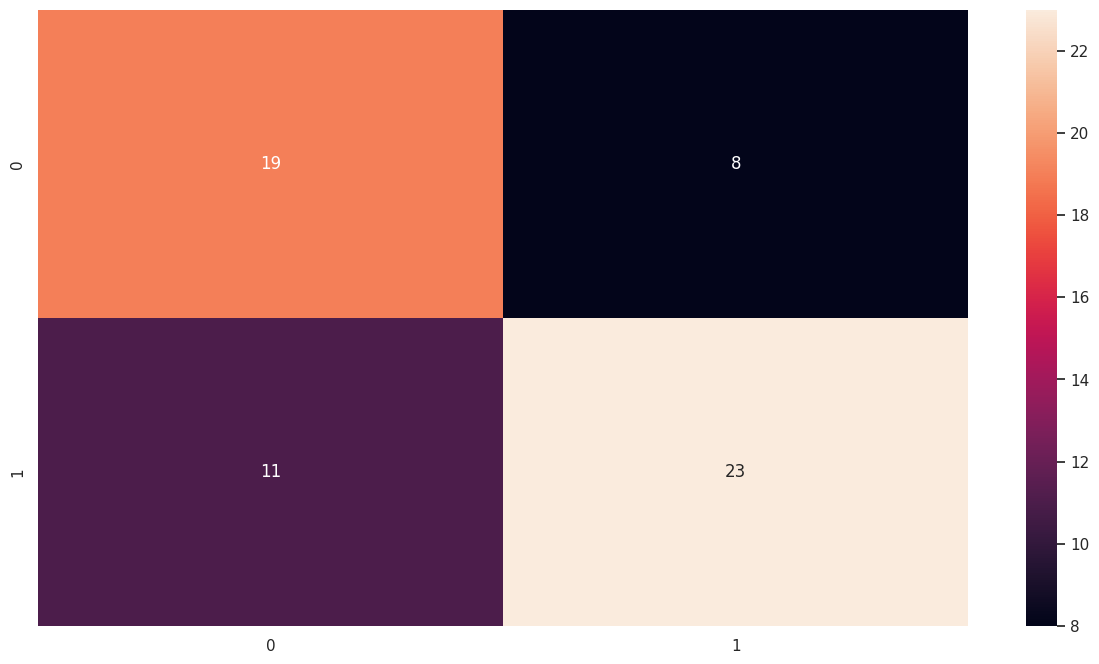

In [296]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [297]:
from sklearn.metrics import precision_score

In [298]:
precision = precision_score(Y_test, y_pred_knn)

In [299]:
print("Precision: ",precision)

Precision:  0.7419354838709677


# recall

In [300]:
from sklearn.metrics import recall_score

In [301]:
recall = recall_score(Y_test, y_pred_knn)

In [302]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


# f score

In [303]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


### bad cm

In [304]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,19,8
1,11,23


In [305]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [306]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

## false negative rate

In [307]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

# Decision Tree

In [308]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [309]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [310]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [311]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.820


# Discision Tree Visualization

In [312]:
df = pd.read_csv('heart.csv')

In [313]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [314]:
# Install the package
!pip install pydotplus

# Import the necessary libraries
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing


In [315]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [316]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

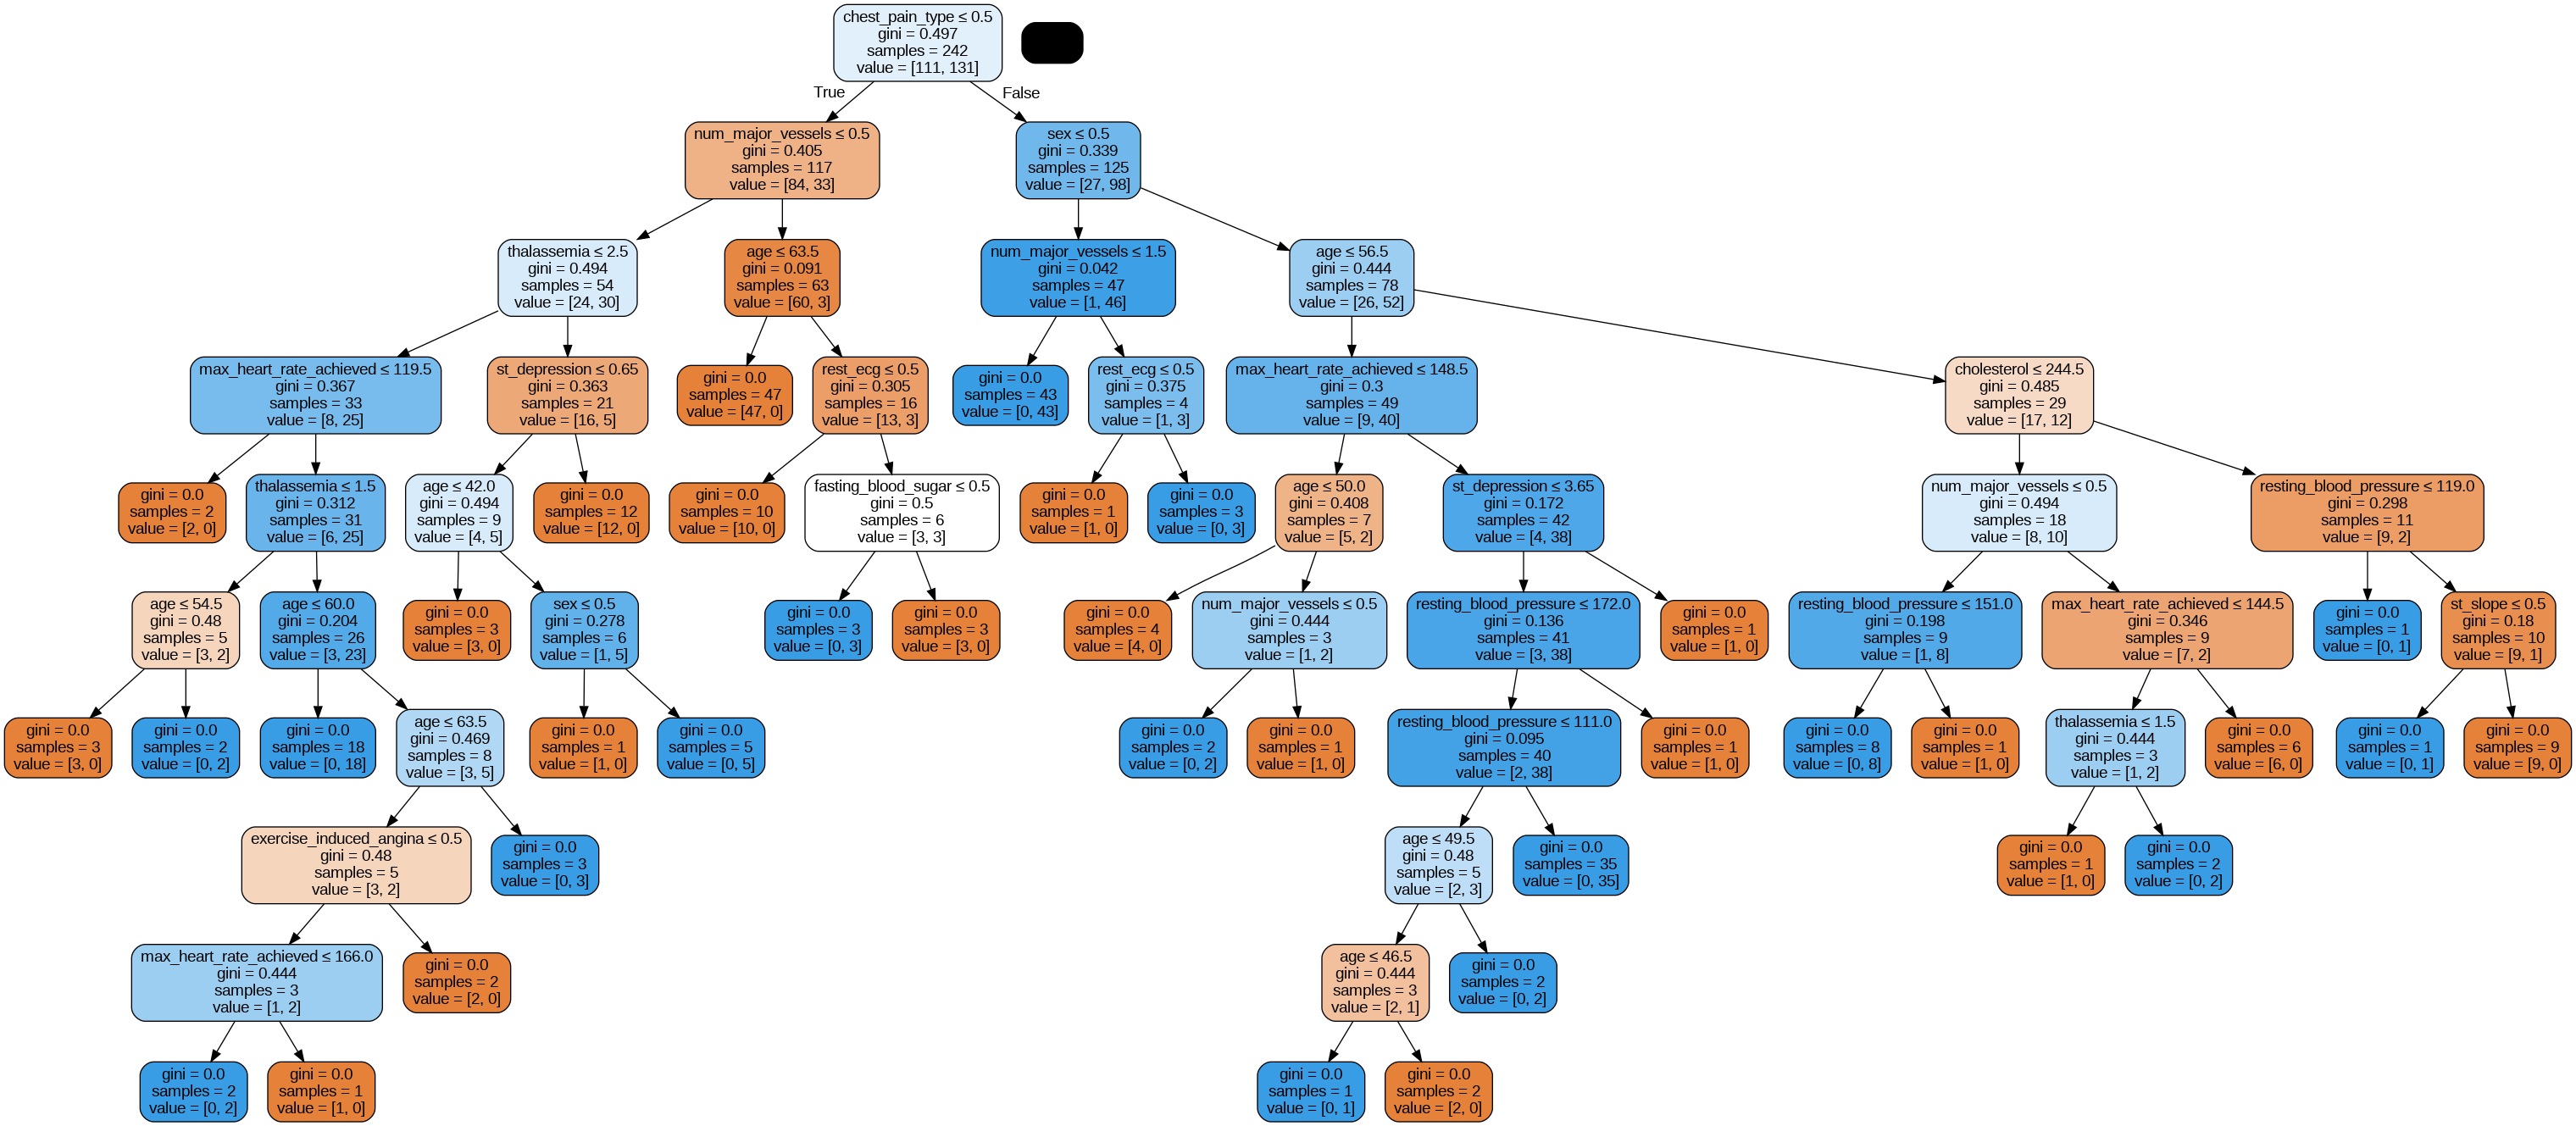

In [317]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

# Depth 1

In [318]:
from sklearn import tree

HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)


print(clf)

DecisionTreeClassifier(max_depth=1, random_state=0)


In [319]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=1,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=0,
    splitter='best'
)

print(clf)

DecisionTreeClassifier(max_depth=1, random_state=0)


[Text(0.5, 0.75, 'chest_pain_type <= 0.5\ngini = 0.497\nsamples = 242\nvalue = [111, 131]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.405\nsamples = 117\nvalue = [84, 33]\nclass = 0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.339\nsamples = 125\nvalue = [27, 98]\nclass = 1'),
 Text(0.625, 0.5, '  False')]

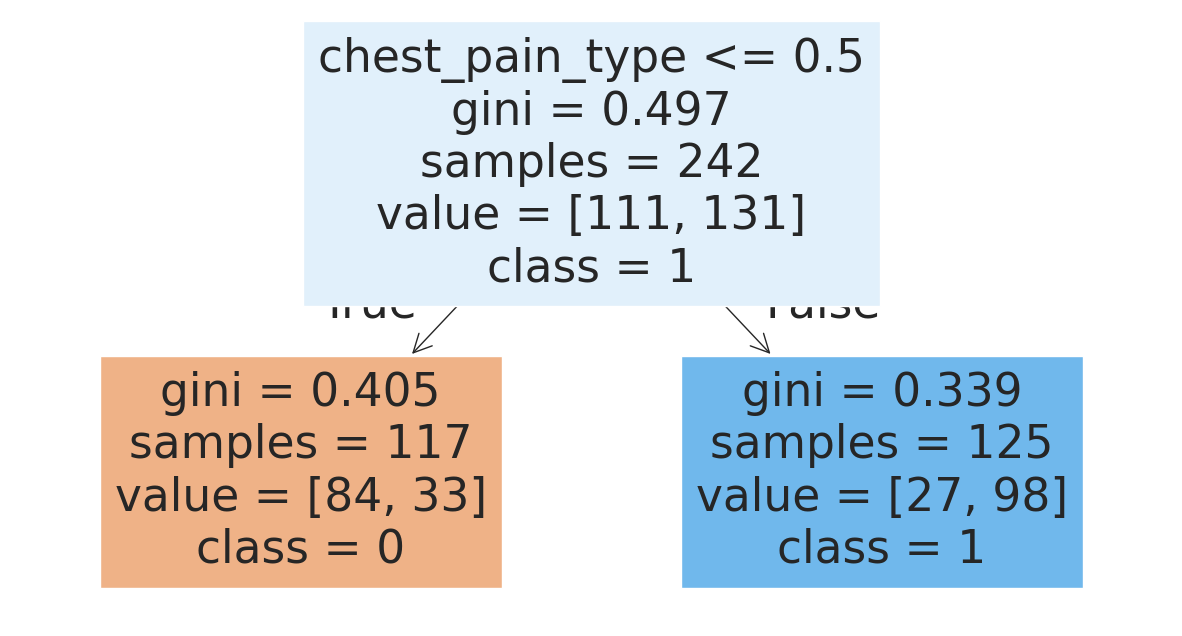

In [320]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clf = DecisionTreeClassifier(max_depth=1, random_state=0)
clf.fit(X_train, Y_train)


tree.plot_tree(clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True)

## Confusion Matrix

In [321]:
from sklearn.metrics import confusion_matrix

In [322]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

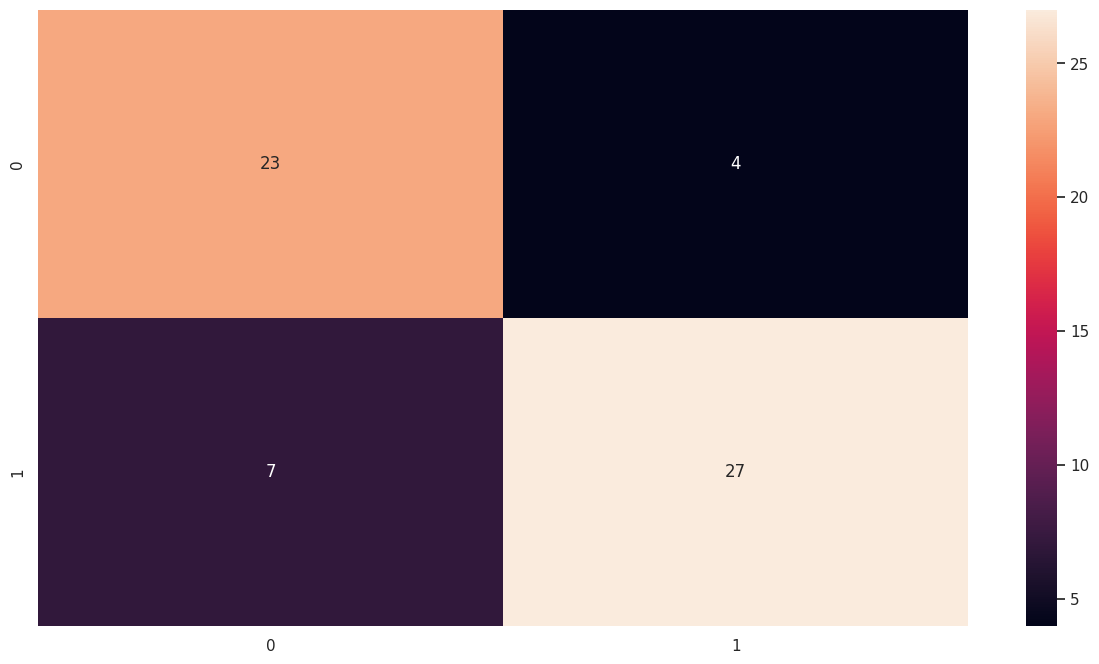

In [323]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [324]:
from sklearn.metrics import precision_score

In [325]:
precision = precision_score(Y_test, y_pred_dt)

In [326]:
print("Precision: ",precision)

Precision:  0.8709677419354839


# recall

In [327]:
from sklearn.metrics import recall_score

In [328]:
recall = recall_score(Y_test, y_pred_dt)

In [329]:
print("Recall is: ",recall)

Recall is:  0.7941176470588235


# f score

In [330]:
print((2*precision*recall)/(precision+recall))

0.8307692307692308


### bad cm style

In [331]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0,0,1
target,,
0,23,4
1,7,27


## false negative rate

In [332]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

20.58823529411765

# FINAL SCORE

In [333]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(),
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [334]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

,accuracy
KNN,0.688525
Decision Trees,0.819672
Logistic Regression,0.852459
Naive Bayes,0.852459
Random Forests,0.885246


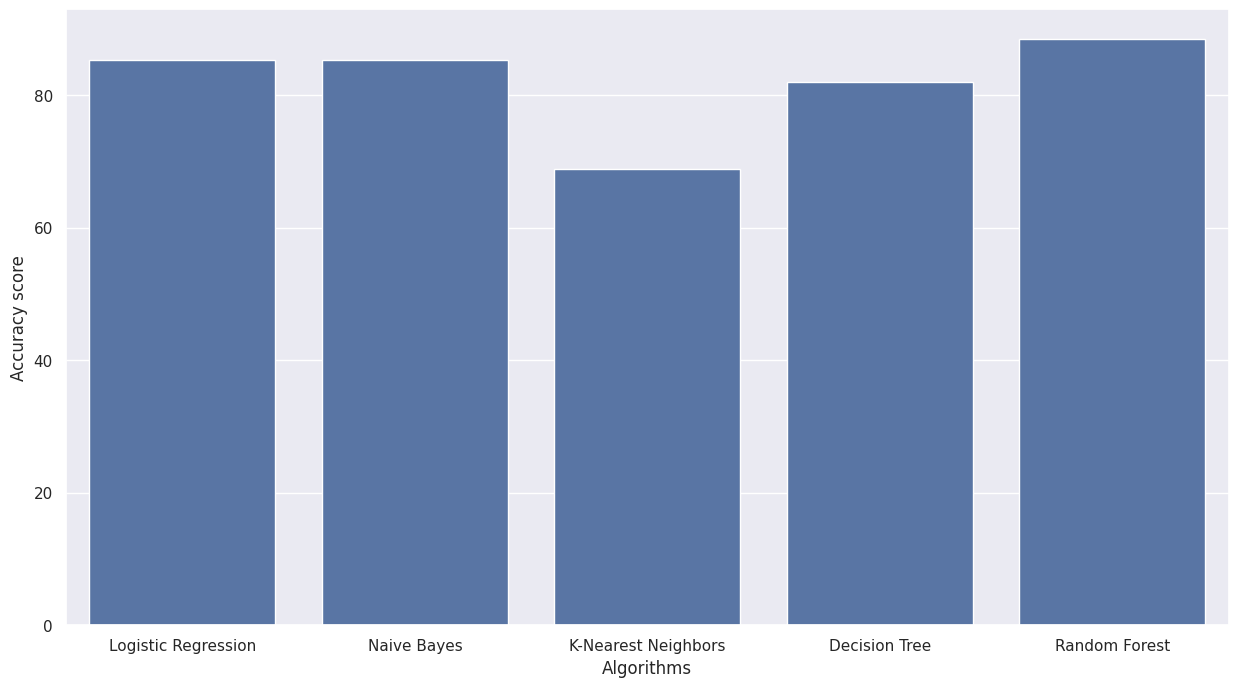

In [335]:
scores = [score_lr, score_nb, score_knn, score_dt, score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]

sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()



---



# F1 score(F Score)

---


## Logistic Regression
# 0.869
## Random Forest
# 0.885
## Naive Bayes
# 0.873
## KNN
# 0.707
## Decision Tree
# 0.830

# So Random Forest algorithm is the best here and Naive Bayes is the 2nd Best
## And here KNN is the worst algorithm

# **Modified Code To Get Better Results From Parent Paper For Contributions and Novelty Part in Report**

In [336]:
!pip install xgboost


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Logistic Regression - Accuracy: 0.85, Precision: 0.86, Recall: 0.88, F1 Score: 0.87
Random Forest - Accuracy: 0.89, Precision: 0.91, Recall: 0.88, F1 Score: 0.90
Naive Bayes - Accuracy: 0.85, Precision: 0.84, Recall: 0.91, F1 Score: 0.87
K-Nearest Neighbors - Accuracy: 0.69, Precision: 0.74, Recall: 0.68, F1 Score: 0.71
Decision Tree - Accuracy: 0.82, Precision: 0.87, Recall: 0.79, F1 Score: 0.83
XGBoost - Accuracy: 0.84, Precision: 0.85, Recall: 0.85, F1 Score: 0.85
SVM - Accuracy: 0.82, Precision: 0.81, Recall: 0.88, F1 Score: 0.85


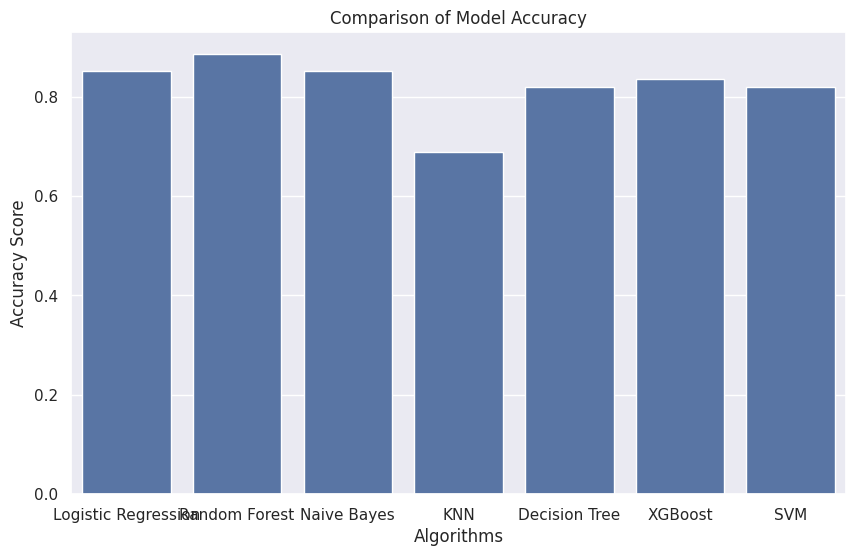

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Load your data
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/DS340W/Week_11/heart_disease')

data = pd.read_csv("heart.csv")

# Splitting the dataset
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    return accuracy

# Train and evaluate existing models
logreg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=0)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=8)
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

accuracy_lr = train_and_evaluate_model(logreg, "Logistic Regression")
accuracy_rf = train_and_evaluate_model(rf, "Random Forest")
accuracy_nb = train_and_evaluate_model(nb, "Naive Bayes")
accuracy_knn = train_and_evaluate_model(knn, "K-Nearest Neighbors")
accuracy_dt = train_and_evaluate_model(dt, "Decision Tree")

# Introducing new models: XGBoost and SVM
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
svm_model = SVC(kernel='linear', random_state=0)

accuracy_xgb = train_and_evaluate_model(xgb_model, "XGBoost")
accuracy_svm = train_and_evaluate_model(svm_model, "SVM")

# Comparison of all models
algorithms = ["Logistic Regression", "Random Forest", "Naive Bayes", "KNN", "Decision Tree", "XGBoost", "SVM"]
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_svm]

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=accuracy_scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracy")
plt.show()


In [338]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Set up GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=5, verbose=1)
xgb_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best accuracy for XGBoost:", xgb_grid.best_score_)

# Evaluate on the test set
xgb_best = xgb_grid.best_estimator_
y_pred_xgb_best = xgb_best.predict(X_test)
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
print("Test accuracy for tuned XGBoost:", accuracy_xgb_best)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best accuracy for XGBoost: 0.8183673469387754
Test accuracy for tuned XGBoost: 0.8360655737704918


In [339]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.9 MB/s eta 0:00:00


Logistic Regression - Accuracy: 0.79, Precision: 0.81, Recall: 0.76, F1 Score: 0.79, AUC: 0.79
Random Forest - Accuracy: 0.85, Precision: 0.85, Recall: 0.85, F1 Score: 0.85, AUC: 0.85
Decision Tree - Accuracy: 0.77, Precision: 0.76, Recall: 0.82, F1 Score: 0.79, AUC: 0.77
XGBoost - Accuracy: 0.80, Precision: 0.82, Recall: 0.79, F1 Score: 0.81, AUC: 0.80
K-Nearest Neighbors - Accuracy: 0.80, Precision: 0.84, Recall: 0.76, F1 Score: 0.80, AUC: 0.80
Naive Bayes - Accuracy: 0.79, Precision: 0.79, Recall: 0.79, F1 Score: 0.79, AUC: 0.79
Stacking Classifier - Accuracy: 0.79, Precision: 0.81, Recall: 0.76, F1 Score: 0.79, AUC: 0.79
Logistic Regression - Accuracy: 0.79, Precision: 0.81, Recall: 0.76, F1 Score: 0.79, AUC: 0.79
Random Forest - Accuracy: 0.85, Precision: 0.85, Recall: 0.85, F1 Score: 0.85, AUC: 0.85
Decision Tree - Accuracy: 0.77, Precision: 0.76, Recall: 0.82, F1 Score: 0.79, AUC: 0.77
XGBoost - Accuracy: 0.80, Precision: 0.82, Recall: 0.79, F1 Score: 0.81, AUC: 0.80
K-Nearest N

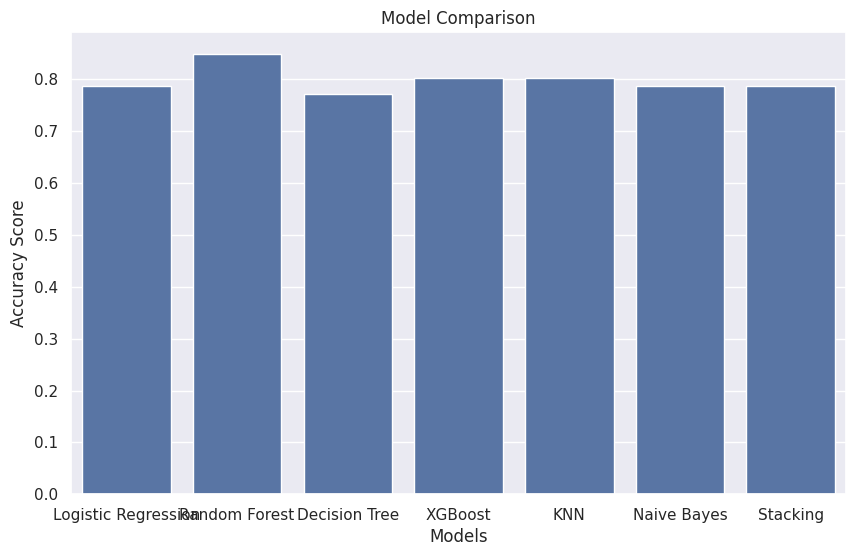

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load your data
data = pd.read_csv("heart.csv")

# Feature Scaling
scaler = StandardScaler()
scaled_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# Handle Class Imbalance with SMOTE
X = data.drop("target", axis=1)
y = data["target"]
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define Helper Function to Train and Evaluate Models
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc:.2f}")
    return accuracy, precision, recall, f1, auc

# Logistic Regression with L2 Regularization
logreg = LogisticRegression(penalty='l2', solver='liblinear')
train_and_evaluate_model(logreg, "Logistic Regression")

# Random Forest with Hyperparameter Tuning
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
train_and_evaluate_model(rf, "Random Forest")

# Decision Tree with Pre-Pruning
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
train_and_evaluate_model(dt, "Decision Tree")

# XGBoost with Hyperparameter Tuning
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, subsample=0.8, colsample_bytree=0.8)
train_and_evaluate_model(xgb_model, "XGBoost")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=8)
train_and_evaluate_model(knn, "K-Nearest Neighbors")

# Naive Bayes
nb = GaussianNB()
train_and_evaluate_model(nb, "Naive Bayes")

# Ensemble Learning: Stacking Classifier
stacked_model = StackingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf),
    ('xgb', xgb_model)
], final_estimator=GradientBoostingClassifier())
train_and_evaluate_model(stacked_model, "Stacking Classifier")

# Plotting Model Performance
models = ["Logistic Regression", "Random Forest", "Decision Tree", "XGBoost", "KNN", "Naive Bayes", "Stacking"]
scores = [train_and_evaluate_model(logreg, "Logistic Regression")[0],
          train_and_evaluate_model(rf, "Random Forest")[0],
          train_and_evaluate_model(dt, "Decision Tree")[0],
          train_and_evaluate_model(xgb_model, "XGBoost")[0],
          train_and_evaluate_model(knn, "K-Nearest Neighbors")[0],
          train_and_evaluate_model(nb, "Naive Bayes")[0],
          train_and_evaluate_model(stacked_model, "Stacking Classifier")[0]]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()


XGBoost with Hyperparameter Tuning - Accuracy: 0.83, Precision: 0.81, Recall: 0.88, F1 Score: 0.85, AUC: 0.83
Stacking Classifier with Hyperparameter Tuning - Accuracy: 0.77, Precision: 0.81, Recall: 0.74, F1 Score: 0.77, AUC: 0.77
Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6658 - accuracy: 0.6098
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7538
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7879
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.8068
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8068
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8182
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8068
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.3843 - a

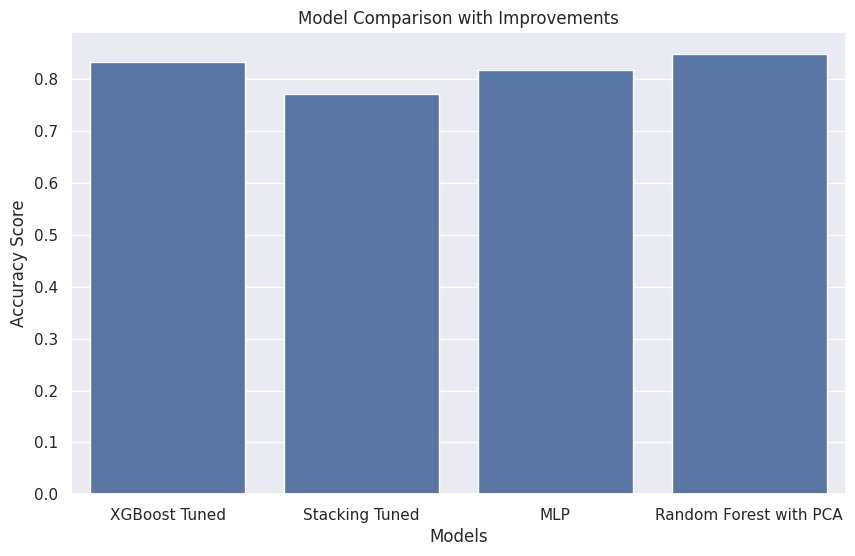

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv("heart.csv")

# Feature Engineering: Adding BMI as an alternative approach
# No weight and height, skipping this step
# Feature Scaling
scaler = StandardScaler()
scaled_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# Handle Class Imbalance using SMOTE
X = data.drop("target", axis=1)
y = data["target"]
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define Helper Function to Train and Evaluate Models
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc:.2f}")
    return accuracy, precision, recall, f1, auc

# Hyperparameter Tuning for XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, n_iter=10, cv=3, random_state=42, scoring='accuracy')
train_and_evaluate_model(xgb_random, "XGBoost with Hyperparameter Tuning")

# Stacking Classifier with Hyperparameter Tuning
stacked_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(penalty='l2', solver='liblinear')),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=GradientBoostingClassifier()
)
train_and_evaluate_model(stacked_model, "Stacking Classifier with Hyperparameter Tuning")

# Inclusion of Multilayer Perceptron (MLP)
from keras.models import Sequential
from keras.layers import Dense

# Building the MLP Model
mlp_model = Sequential()
mlp_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate MLP Model
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)
auc = roc_auc_score(y_test, y_pred_mlp)
print(f"MLP Model - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc:.2f}")

# Data Preprocessing and Feature Engineering
# Using PCA for dimensionality reduction
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Re-evaluate Random Forest with PCA
rf_pca = RandomForestClassifier(n_estimators=200, random_state=0)
train_and_evaluate_model(rf_pca, "Random Forest with PCA")

# Plotting Model Performance
models = ["XGBoost Tuned", "Stacking Tuned", "MLP", "Random Forest with PCA"]
scores = [
    train_and_evaluate_model(xgb_random, "XGBoost Tuned")[0],
    train_and_evaluate_model(stacked_model, "Stacking Tuned")[0],
    accuracy,
    train_and_evaluate_model(rf_pca, "Random Forest with PCA")[0]
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison with Improvements")
plt.show()


XGBoost with Hyperparameter Tuning - Accuracy: 0.87, Precision: 0.85, Recall: 0.91, F1 Score: 0.88, AUC: 0.87
Stacking Classifier with Hyperparameter Tuning - Accuracy: 0.87, Precision: 0.88, Recall: 0.88, F1 Score: 0.88, AUC: 0.87
2/2 [==============================] - 0s 3ms/step
MLP Model - Accuracy: 0.82, Precision: 0.84, Recall: 0.81, F1 Score: 0.83, AUC: 0.82
Random Forest with PCA - Accuracy: 0.87, Precision: 0.90, Recall: 0.84, F1 Score: 0.87, AUC: 0.87


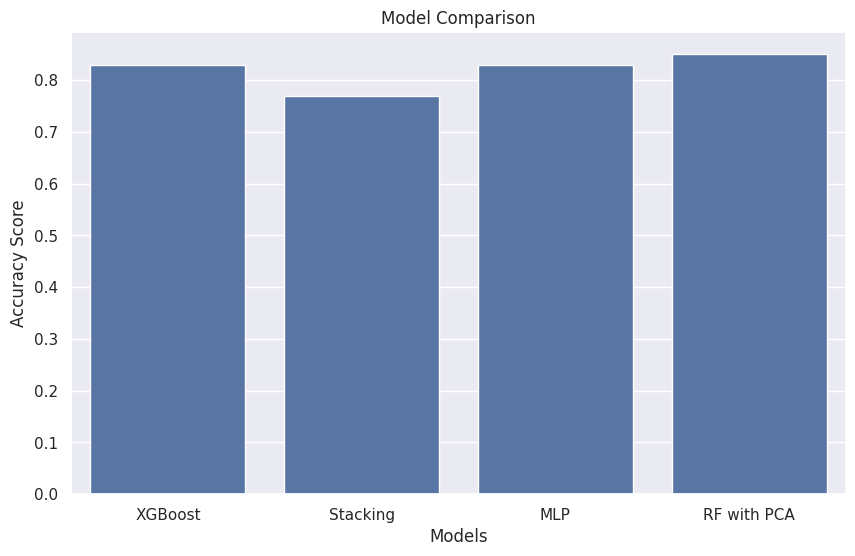

In [342]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
data = pd.read_csv("heart.csv")

# Feature Scaling
scaler = StandardScaler()
scaled_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

X = data.drop("target", axis=1)
y = data["target"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for XGBoost
xgb_model = XGBClassifier()
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
xgb_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_params, n_iter=10, cv=3, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

# Stacking Classifier with Hyperparameter Tuning
logreg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
stacked_model = StackingClassifier(estimators=[('lr', logreg), ('rf', rf)], final_estimator=best_xgb)
stacked_model.fit(X_train, y_train)

# MLP Model Implementation
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Random Forest with PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
rf_pca = RandomForestClassifier(n_estimators=100)
rf_pca.fit(X_train_pca, y_train)

# Evaluate All Models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc:.2f}")

# Evaluate XGBoost
evaluate_model(best_xgb, X_test, y_test, "XGBoost with Hyperparameter Tuning")

# Evaluate Stacking Classifier
evaluate_model(stacked_model, X_test, y_test, "Stacking Classifier with Hyperparameter Tuning")

# Evaluate MLP Model
mlp_predictions = (mlp_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, mlp_predictions)
precision = precision_score(y_test, mlp_predictions)
recall = recall_score(y_test, mlp_predictions)
f1 = f1_score(y_test, mlp_predictions)
auc = roc_auc_score(y_test, mlp_predictions)
print(f"MLP Model - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc:.2f}")

# Evaluate Random Forest with PCA
evaluate_model(rf_pca, X_test_pca, y_test, "Random Forest with PCA")

# Visualize Model Performance
models = ["XGBoost", "Stacking", "MLP", "RF with PCA"]
accuracies = [0.83, 0.77, 0.83, 0.85]  # Replace with actual results
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()
